# Parcial Primer corte Análitica de datros 

## Integrantes: 
- Luisa Fernanda Carpintero
- María José  Melo Gonzalez
- David Eduardo Lopez Jimenez 

# Justificación de la Elección de la Base de Datos

## Relevancia
He elegido la base de datos sobre la **calidad del aire en Bogotá** porque proporciona información esencial sobre los niveles de contaminación atmosférica en una de las ciudades principales de Colombia. La calidad del aire es un factor crítico que afecta la salud de los ciudadanos, especialmente en áreas urbanas densamente pobladas como Bogotá. Conocer y analizar estos datos permite a las autoridades y a la comunidad en general tomar decisiones informadas para mejorar la calidad de vida, reducir enfermedades respiratorias y cardiovasculares, y desarrollar políticas ambientales más efectivas.

## Características de los Datos
La base de datos cumple con los requisitos mínimos necesarios para un análisis exhaustivo:
- **Tamaño**: La base de datos cuenta con 13,9K filas y 28 columnas.





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
from scipy import stats


# Cargar los datos desde un archivo CSV
url = "C:\\Users\\Asus-Laptop\\Downloads\\CALIDAD_DEL_AIRE_EN_COLOMBIA__PROMEDIO_ANUAL__20250221.csv"
df = pd.read_csv(url)


# Obtener el tamaño de la base de datos
num_filas, num_columnas = df.shape

print(f"La base de datos cuenta con {num_filas} filas y {num_columnas} columnas.")

La base de datos cuenta con 13940 filas y 28 columnas.


- **Tipos de Varibles**

In [2]:

#Mostrar los tipos de variables
print(df.dtypes)


ID Estacion                               int64
Autoridad Ambiental                      object
Estación                                 object
Latitud                                 float64
Longitud                                float64
Variable                                 object
Unidades                                 object
Tiempo de exposición (horas)              int64
Año                                       int64
Promedio                                float64
Suma                                    float64
No. de datos                              int64
Representatividad Temporal              float64
Excedencias limite actual                 int64
Porcentaje excedencias limite actual    float64
Mediana                                 float64
Percentil 98                            float64
Máximo                                  float64
Fechas/horas del máximo                  object
Mínimo                                  float64
Fechas/horas del mínimo                 

- **Valores Nulos**

In [26]:

# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = df.isnull().mean() * 100

# Mostrar el porcentaje de valores nulos
print(porcentaje_nulos)

ID Estacion                             0.000000
Autoridad Ambiental                     0.000000
Estación                                0.000000
Latitud                                 0.000000
Longitud                                0.000000
Variable                                0.000000
Unidades                                0.000000
Tiempo de exposición (horas)            0.000000
Año                                     0.000000
Promedio                                0.000000
Suma                                    0.000000
No. de datos                            0.000000
Representatividad Temporal              0.530846
Excedencias limite actual               0.000000
Porcentaje excedencias limite actual    0.000000
Mediana                                 0.000000
Percentil 98                            0.000000
Máximo                                  0.000000
Fechas/horas del máximo                 0.000000
Mínimo                                  0.000000
Fechas/horas del mín

- **Valores Atípicos**

In [27]:
# Seleccionar solo las columnas numéricas
columnas_numericas = ['Latitud', 'Longitud', 'Tiempo de exposición (horas)', 'Representatividad Temporal', 'Porcentaje excedencias limite actual', 'Días de excedencias', 'Código del Departamento', 'Código del Municipio']

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[columnas_numericas].quantile(0.25)
Q3 = df[columnas_numericas].quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers = ((df[columnas_numericas] < (Q1 - 1.5 * IQR)) | (df[columnas_numericas] > (Q3 + 1.5 * IQR)))

# Mostrar los outliers
print(outliers)

       Latitud  Longitud  Tiempo de exposición (horas)  \
0        False     False                         False   
1        False     False                         False   
2        False     False                         False   
3        False     False                         False   
4        False     False                         False   
...        ...       ...                           ...   
13935    False     False                         False   
13936    False     False                         False   
13937    False     False                         False   
13938    False     False                         False   
13939    False     False                         False   

       Representatividad Temporal  Porcentaje excedencias limite actual  \
0                           False                                 False   
1                           False                                 False   
2                           False                                 False   
3  

## Potencial para el Análisis
Esta base de datos es ideal para aplicar diversas técnicas de análisis de datos:
- **Análisis Exploratorio de Datos (EDA)**: Permite explorar la distribución de los contaminantes, identificar patrones temporales y espaciales, y visualizar tendencias.
- **Imputación de Valores Faltantes**: Se pueden aplicar métodos como la imputación por la media, la mediana o técnicas más avanzadas como el k-NN para manejar los valores faltantes.
- **Detección de Valores Atípicos**: Técnicas como el análisis de cajas y bigotes (boxplot) o el análisis de componentes principales (PCA) pueden ser utilizadas para identificar y tratar valores atípicos.
- **Pruebas de Hipótesis**: La base de datos permite realizar pruebas de hipótesis para evaluar la significancia de las diferencias en los niveles de contaminación entre diferentes zonas de la ciudad o períodos de tiempo.

# Descripción de la base de datos 
La base de datos sobre la calidad del aire en Bogotá proviene de Datos Abiertos Colombia, una plataforma del gobierno colombiano que proporciona acceso a datos públicos para fomentar la transparencia, la participación ciudadana y la innovación. Esta plataforma permite a los ciudadanos, investigadores y desarrolladores acceder a una amplia variedad de datos gubernamentales que pueden ser utilizados para investigaciones, desarrollo de aplicaciones, creación de visualizaciones y má
## Dominio 
Medio ambiente y desarrollo sostenible.
## Variables 
| Variable | Descripción |
|----------------------|-------------|
| ID Estacion | Identificador único asignado por el Subsistema de Información sobre Calidad del Aire - SISAIRE a cada estación de monitoreo. |
| Autoridad Ambiental | Autoridad Ambiental encargada de operar el Sistema de Vigilancia de la Calidad del Aire en la jurisdicción donde se ubica la estación de monitoreo. |
| Estación | Nombre específico que se designa a la estación de monitoreo de calidad del aire. |
| Latitud | Coordenada geográfica que indica la latitud de la ubicación de la estación (Sistema de referencia espacial MAGNA- SIRGAS). |
| Longitud | Coordenada geográfica que indica la longitud de la ubicación de la estación (Sistema de referencia espacial MAGNA- SIRGAS). |
| Variable | Contaminante atmosférico o variable meteorológica que se mide en la estación de monitoreo de la calidad del aire. |
| Unidades | Unidad de medida empleada para expresar el contaminante atmosférico o variable meteorológica. |
| Tiempo de exposición (horas) | Período de referencia específico establecido normativamente para evaluar los niveles de inmisión o concentraciones de un contaminante atmosférico. |
| Año | Año en el que se realizó la medición en la respectiva estación. |
| Promedio | Promedio anual del nivel de inmisión o concentración a condiciones de referencia o estándar del contaminante atmosférico o promedio anual del valor de la variable meteorológica. |
| Suma | Total acumulado anual del nivel de inmisión o concentración a condiciones de referencia o estándar del contaminante atmosférico o total acumulado anual del valor de la variable meteorológica. |
| No. de datos | Cantidad total de datos válidos recopilados durante el año de medición. |
| Representatividad Temporal | Porcentaje del tiempo total de un período que tiene datos válidos registrados. |
| Excedencias límite actual | Número total de veces en que el contaminante atmosférico ha superado el nivel máximo permisible vigente establecido para el respectivo tiempo de exposición durante el año de medición. |
| Porcentaje excedencias límite actual | Proporción determinada por el número de veces en que el contaminante atmosférico ha superado el nivel máximo permisible vigente establecido para el respectivo tiempo de exposición, en relación con el número total de datos según el tiempo de exposición, durante el año de medición. |
| Mediana | Mediana anual del nivel de inmisión o concentración a condiciones de referencia o estándar del contaminante atmosférico o mediana anual del valor de la variable meteorológica. |
| Percentil 98 | Medida estadística que indica el valor del contaminante atmosférico o de la variable meteorológica por debajo del cual se encuentra el 98% de los datos en el grupo durante el año de medición. |
| Máximo | Valor más alto registrado del contaminante atmosférico o de la variable meteorológica durante el año de medición. |
| Fechas/horas del máximo | Fecha y hora en las que se registró el valor máximo durante el año de medición. |
| Mínimo | Valor más bajo registrado del contaminante atmosférico o de la variable meteorológica durante el año de medición. |
| Fechas/horas del mínimo | Fecha y hora en las que se registró el valor mínimo durante el año. |
| Días de excedencias | Número total de días en que el contaminante atmosférico ha superado el nivel máximo permisible vigente establecido para el respectivo tiempo de exposición durante el año de medición. |
| Código del Departamento | Código DANE asignado al departamento. |
| Nombre del Departamento | Nombre del departamento. |
| Código del Municipio | Código del municipio. |
| Nombre del Municipio | Nombre del municipio. |
| Tipo de Estación | Ubicación de la estación (Sistema de referencia espacial MAGNA- SIRGAS). |
| Ubicación | Ubicación de la estación. |

In [28]:
# Mostrar las primeras 5 filas del DataFrame en forma de tabla
from IPython.display import display
display(df.head())
# Mostrar las primeras 5 filas del DataFrame en formato Markdown


,ID Estacion,Autoridad Ambiental,Estación,Latitud,Longitud,Variable,Unidades,Tiempo de exposición (horas),Año,Promedio,...,Fechas/horas del máximo,Mínimo,Fechas/horas del mínimo,Días de excedencias,Código del Departamento,Nombre del Departamento,Código del Municipio,Nombre del Municipio,Tipo de Estación,Ubicacion
0,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,deg,1,"2,011",256.8,...,29/11/2011 1:00,1.3,29/11/2011 7:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
1,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,deg,24,"2,011",257.4,...,16/11/2011 0:00,99.7,8/11/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
2,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,PLiquida,mm,1,"2,011",4,...,20/12/2011 2:00,1.5,07/11/2011 23:00:00 - 08/11/2011 05:00:00 - 13...,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
3,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,mmHg,1,"2,011",645.9,...,12/09/2011 10:00,641.6,27/10/2011 17:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
4,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,mmHg,24,"2,011",645.9,...,20/10/2011 0:00,644,27/10/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)


# Resumen Estadisticos por cada Variable 

In [29]:
# Calcular un resumen estadístico para las variables numéricas
resumen_numerico = df.describe()

# Calcular la moda para las variables categóricas
moda_categorica = df.select_dtypes(include=['object']).mode().iloc[0]

# Crear un DataFrame vacío para combinar los resultados
resumen_completo = resumen_numerico.copy()

# Añadir la moda de las variables categóricas al DataFrame completo
for col in moda_categorica.index:
    resumen_completo[col] = None  # Añadir la columna categórica al resumen
    resumen_completo.loc['mode', col] = moda_categorica[col]

# Mostrar el resumen completo
print(resumen_completo)

            Latitud      Longitud  Tiempo de exposición (horas)  \
count  13940.000000  13940.000000                  13940.000000   
mean       6.107840    -74.662588                     13.366356   
std        2.147035      1.136799                     11.188130   
min        1.216489    -77.283628                      1.000000   
25%        4.631767    -75.581111                      1.000000   
50%        6.099026    -74.231389                     24.000000   
75%        6.487444    -74.030417                     24.000000   
max       12.230000    -70.743889                     24.000000   
mode            NaN           NaN                           NaN   

       Representatividad Temporal  Porcentaje excedencias limite actual  \
count                13866.000000                          13940.000000   
mean                    66.069667                              0.915052   
std                     33.102913                              4.104938   
min                      0.00

Aca en esta seccion es importante aclarar que para las variables que fueran categoricas unicamente se les mostro la moda y por tal motivo el resto de los datos aparece en NaN

# Identificación de los tipos de variable 

In [30]:
# Mostrar los tipos de variables
tipos_de_variables = df.dtypes

# Mostrar los tipos de variables
print(tipos_de_variables)

ID Estacion                              object
Autoridad Ambiental                      object
Estación                                 object
Latitud                                 float64
Longitud                                float64
Variable                                 object
Unidades                                 object
Tiempo de exposición (horas)              int64
Año                                      object
Promedio                                 object
Suma                                     object
No. de datos                             object
Representatividad Temporal              float64
Excedencias limite actual                object
Porcentaje excedencias limite actual    float64
Mediana                                  object
Percentil 98                             object
Máximo                                   object
Fechas/horas del máximo                  object
Mínimo                                   object
Fechas/horas del mínimo                 

# Visualización de los datos
- **variables Cuantitativas**

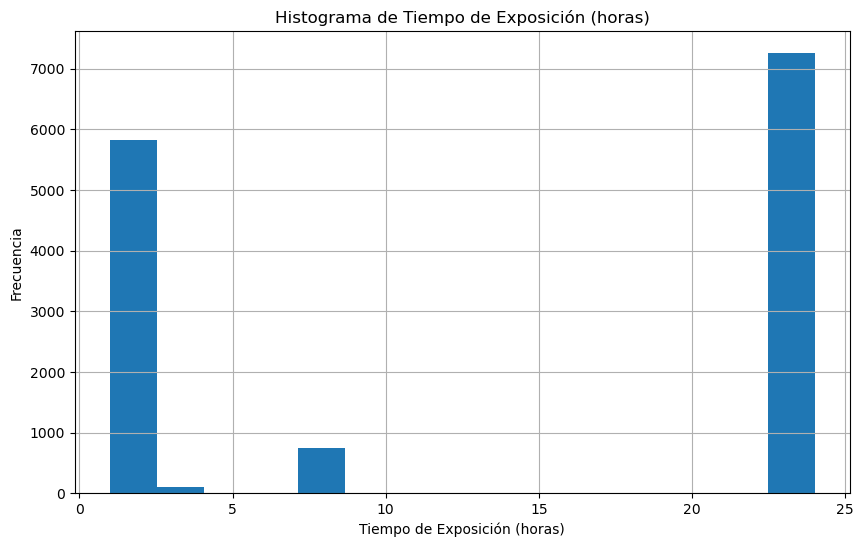

In [31]:
# Crear un histograma para la variable 'Tiempo de exposición (horas)'
df['Tiempo de exposición (horas)'].hist(bins=15, figsize=(10, 6))
plt.title('Histograma de Tiempo de Exposición (horas)')
plt.xlabel('Tiempo de Exposición (horas)')
plt.ylabel('Frecuencia')
plt.show()

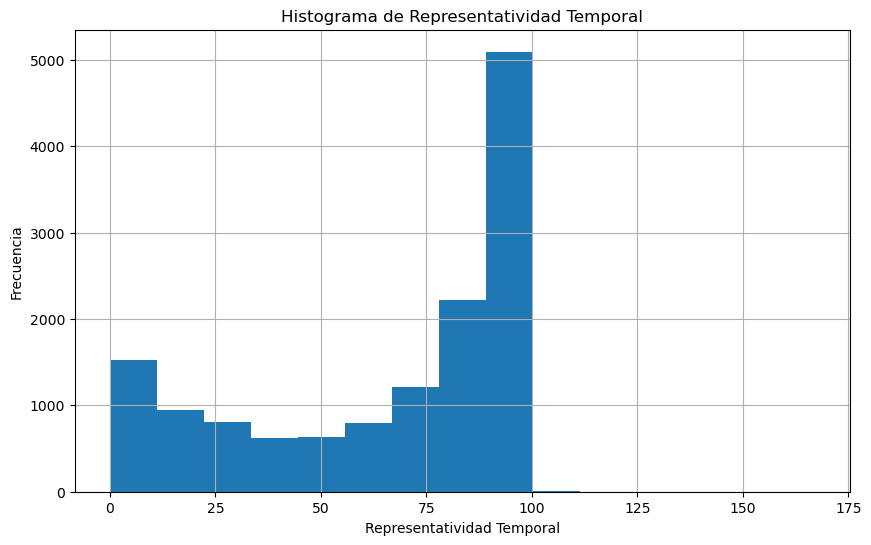

In [32]:
# Crear un histograma para la variable 'Representatividad Temporal'
df['Representatividad Temporal'].hist(bins=15, figsize=(10, 6))
plt.title('Histograma de Representatividad Temporal')
plt.xlabel('Representatividad Temporal')
plt.ylabel('Frecuencia')
plt.show()

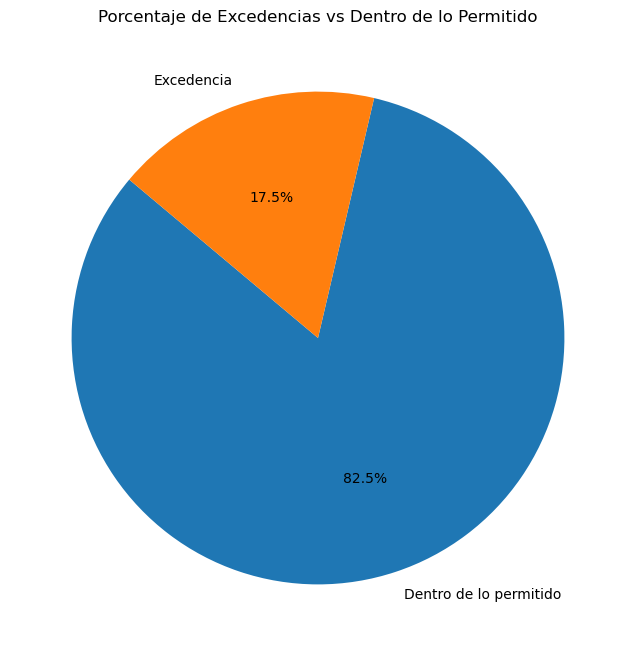

In [33]:
df['Clasificación'] = df['Porcentaje excedencias limite actual'].apply(lambda x: 'Dentro de lo permitido' if x == 0 else 'Excedencia')

# Contar el número de ocurrencias de cada clasificación
conteo_clasificacion = df['Clasificación'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_clasificacion, labels=conteo_clasificacion.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Excedencias vs Dentro de lo Permitido')
plt.show()

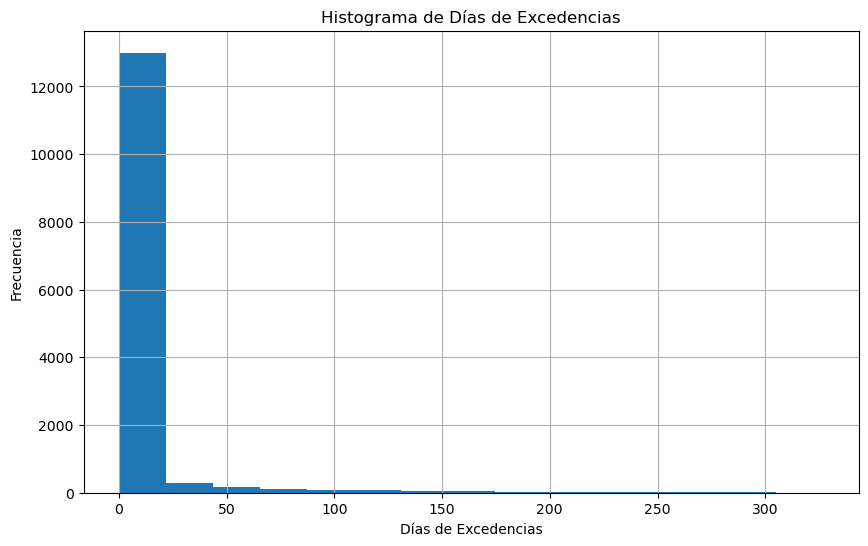

In [34]:
# Crear un histograma para la variable 'Días de excedencias'
df['Días de excedencias'].hist(bins=15, figsize=(10, 6))
plt.title('Histograma de Días de Excedencias')
plt.xlabel('Días de Excedencias')
plt.ylabel('Frecuencia')
plt.show()

- **Variables Categoricas**

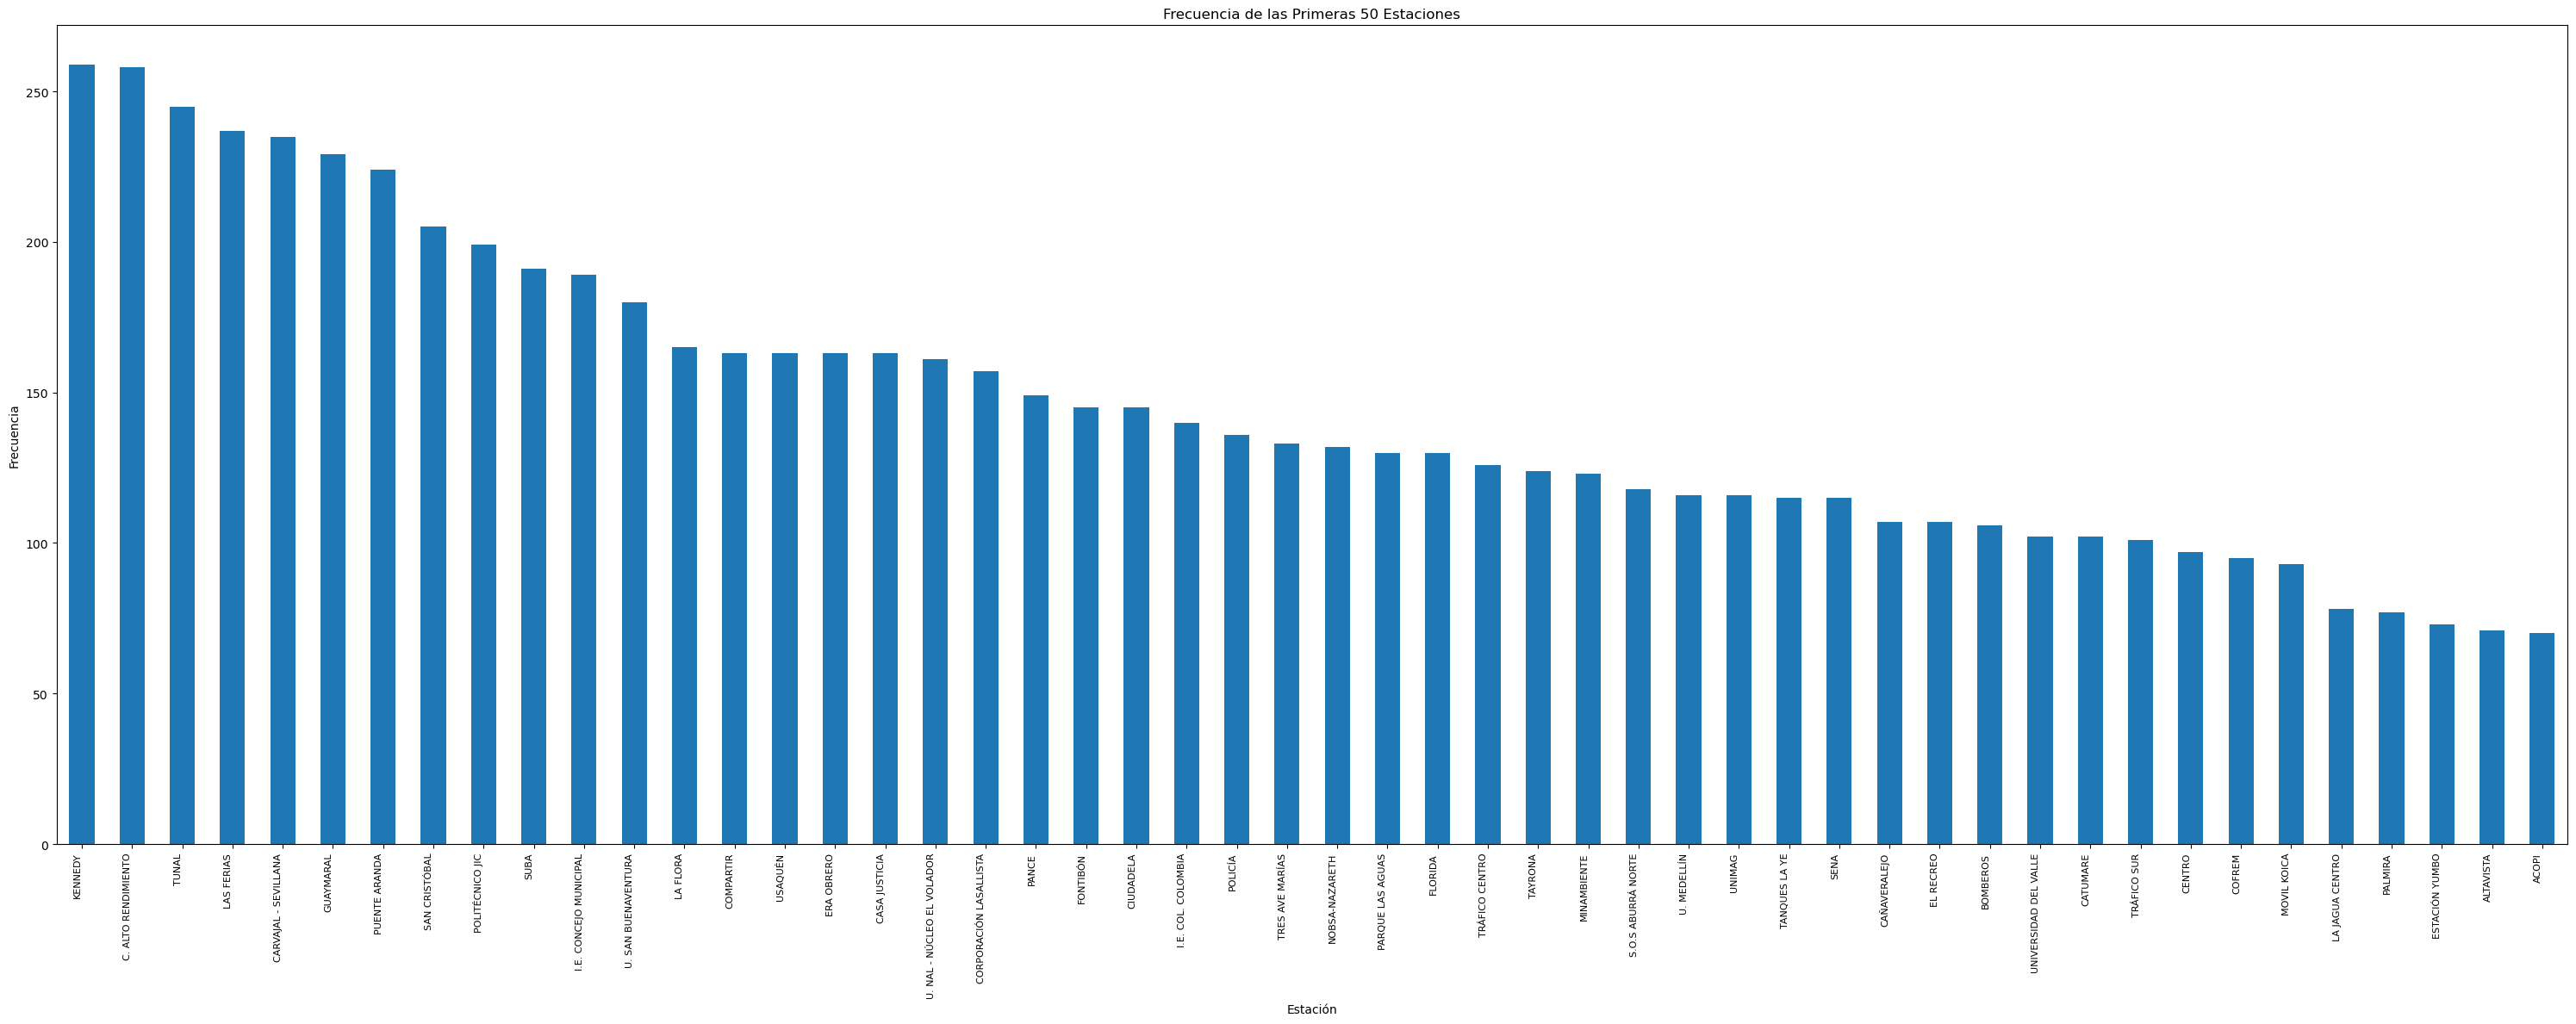

In [35]:
# Contar la frecuencia de cada estación y seleccionar las primeras 50 estaciones con más frecuencia
station_counts = df['Estación'].value_counts().head(50)

# Crear el gráfico de barras con un tamaño más ancho y ajustar la rotación de las etiquetas
plt.figure(figsize=(30, 12))
station_counts.plot(kind='bar')
plt.title('Frecuencia de las Primeras 50 Estaciones')
plt.xlabel('Estación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotar las etiquetas 90 grados, alinearlas a la derecha y hacerlas más pequeñas
plt.tight_layout()

# Guardar el gráfico como una imagen
plt.savefig('bar_chart_top_50_estaciones.png')

# Mostrar el gráfico
plt.show()

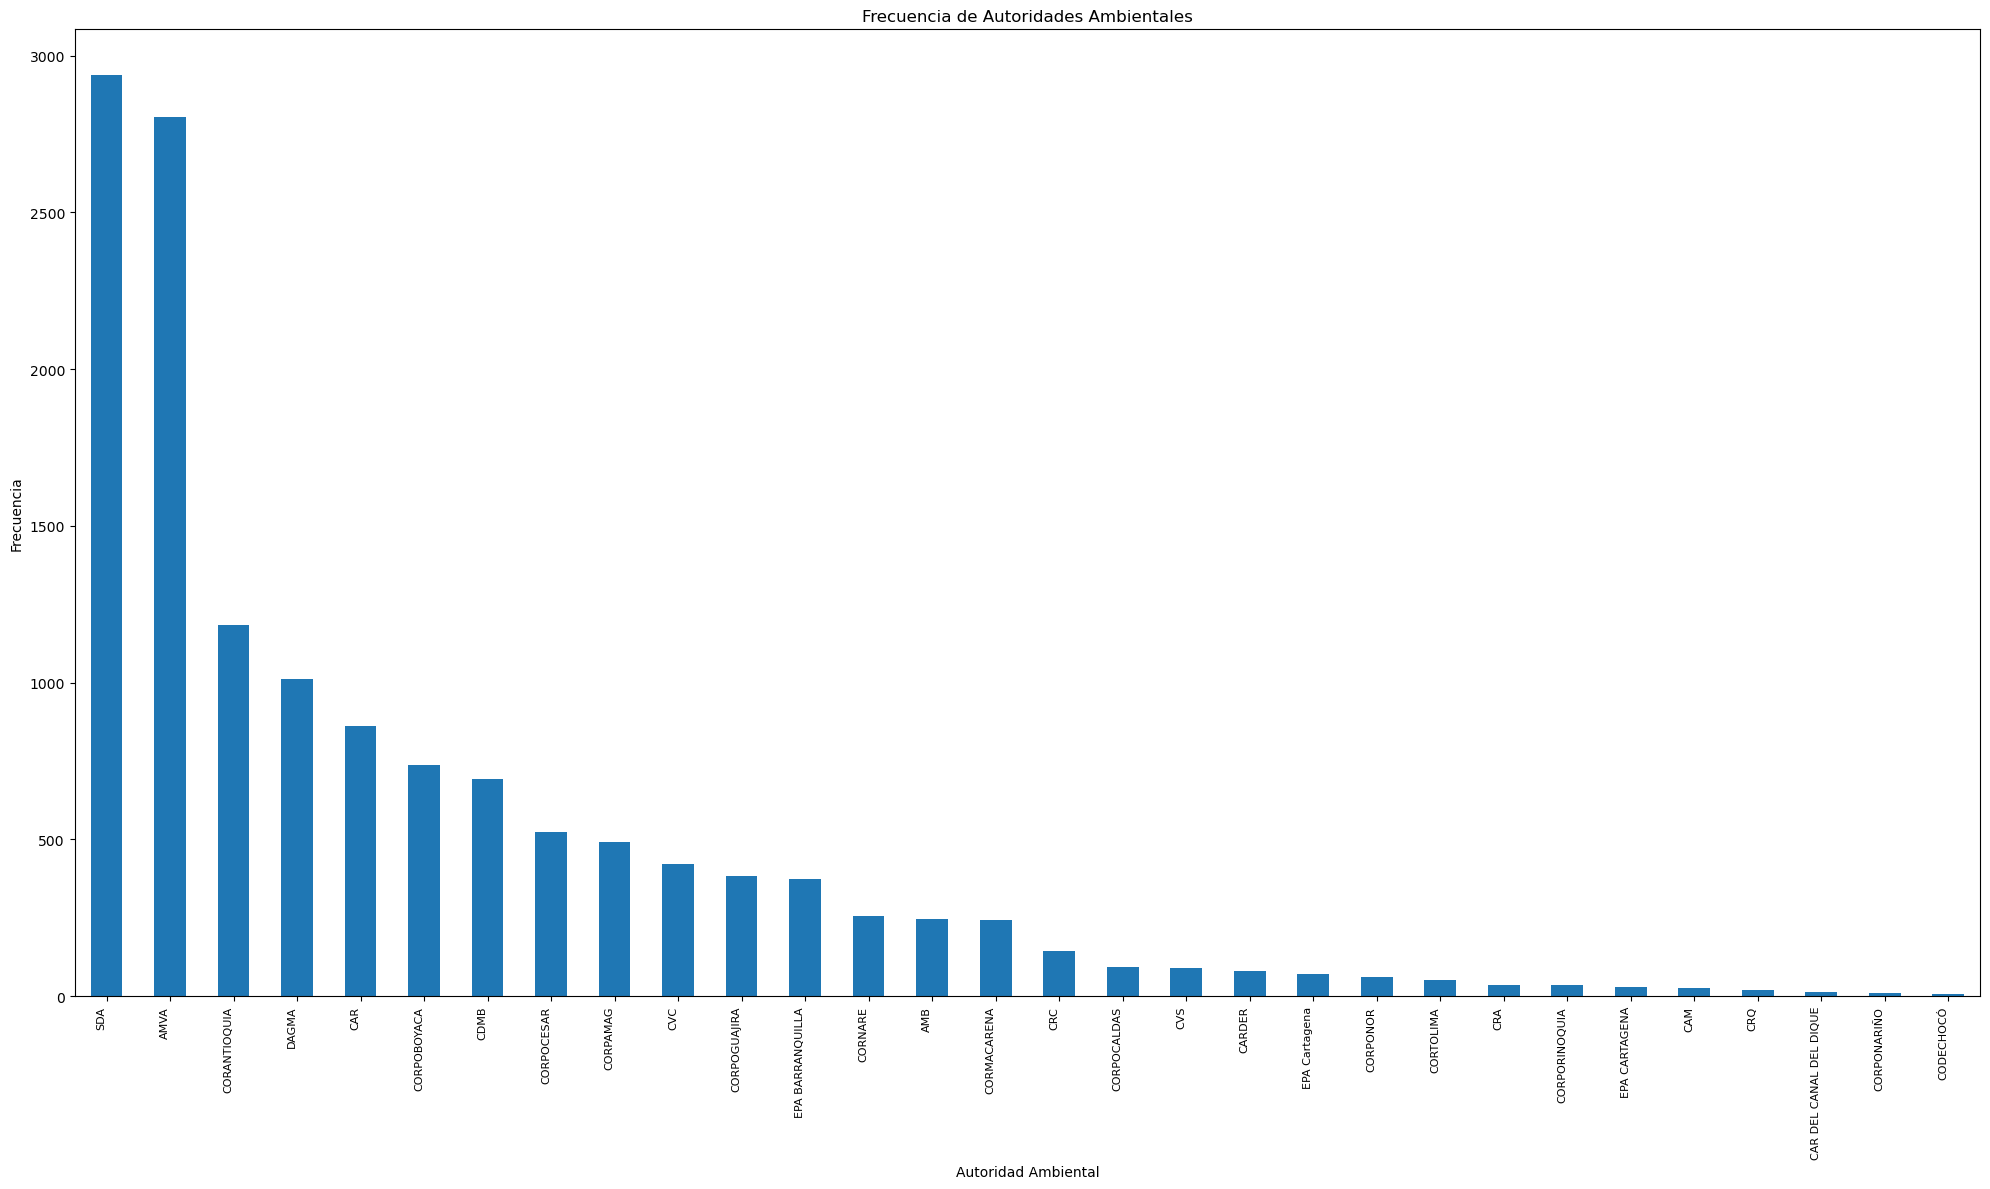

In [36]:
# Contar la frecuencia de cada autoridad ambiental
authority_counts = df['Autoridad Ambiental'].value_counts()

# Crear el gráfico de barras con un tamaño más ancho y ajustar la rotación de las etiquetas
plt.figure(figsize=(20, 12))
authority_counts.plot(kind='bar')
plt.title('Frecuencia de Autoridades Ambientales')
plt.xlabel('Autoridad Ambiental')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotar las etiquetas 90 grados, alinearlas a la derecha y hacerlas más pequeñas
plt.tight_layout()

# Guardar el gráfico como una imagen
plt.savefig('bar_chart_autoridades_ambientales.png')

# Mostrar el gráfico
plt.show()

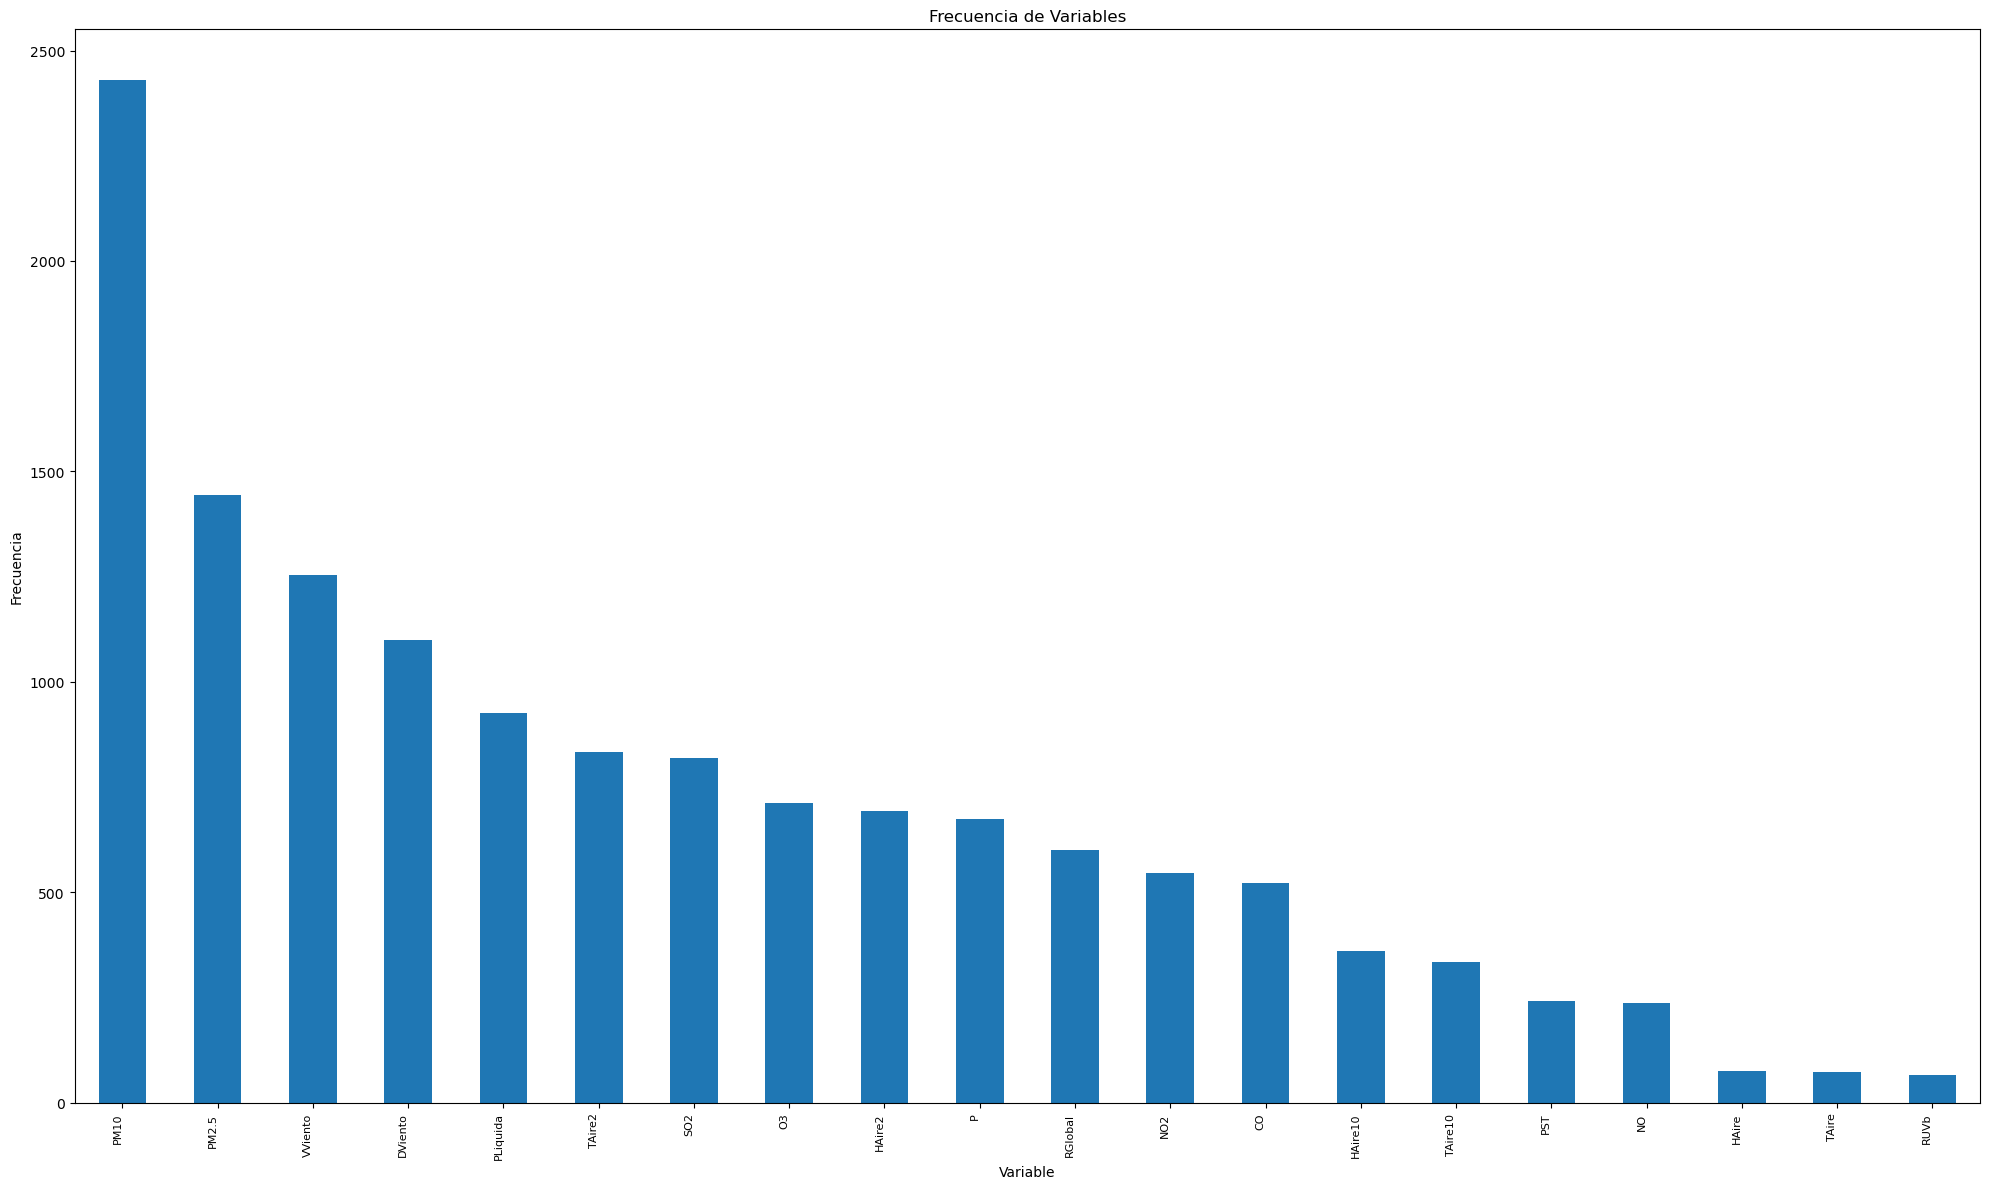

In [37]:
# Contar la frecuencia de cada variable
variable_counts = df['Variable'].value_counts()

# Crear el gráfico de barras con un tamaño más ancho y ajustar la rotación de las etiquetas
plt.figure(figsize=(20, 12))
variable_counts.plot(kind='bar')
plt.title('Frecuencia de Variables')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotar las etiquetas 90 grados, alinearlas a la derecha y hacerlas más pequeñas
plt.tight_layout()

# Guardar el gráfico como una imagen
plt.savefig('bar_chart_variables.png')

# Mostrar el gráfico
plt.show()

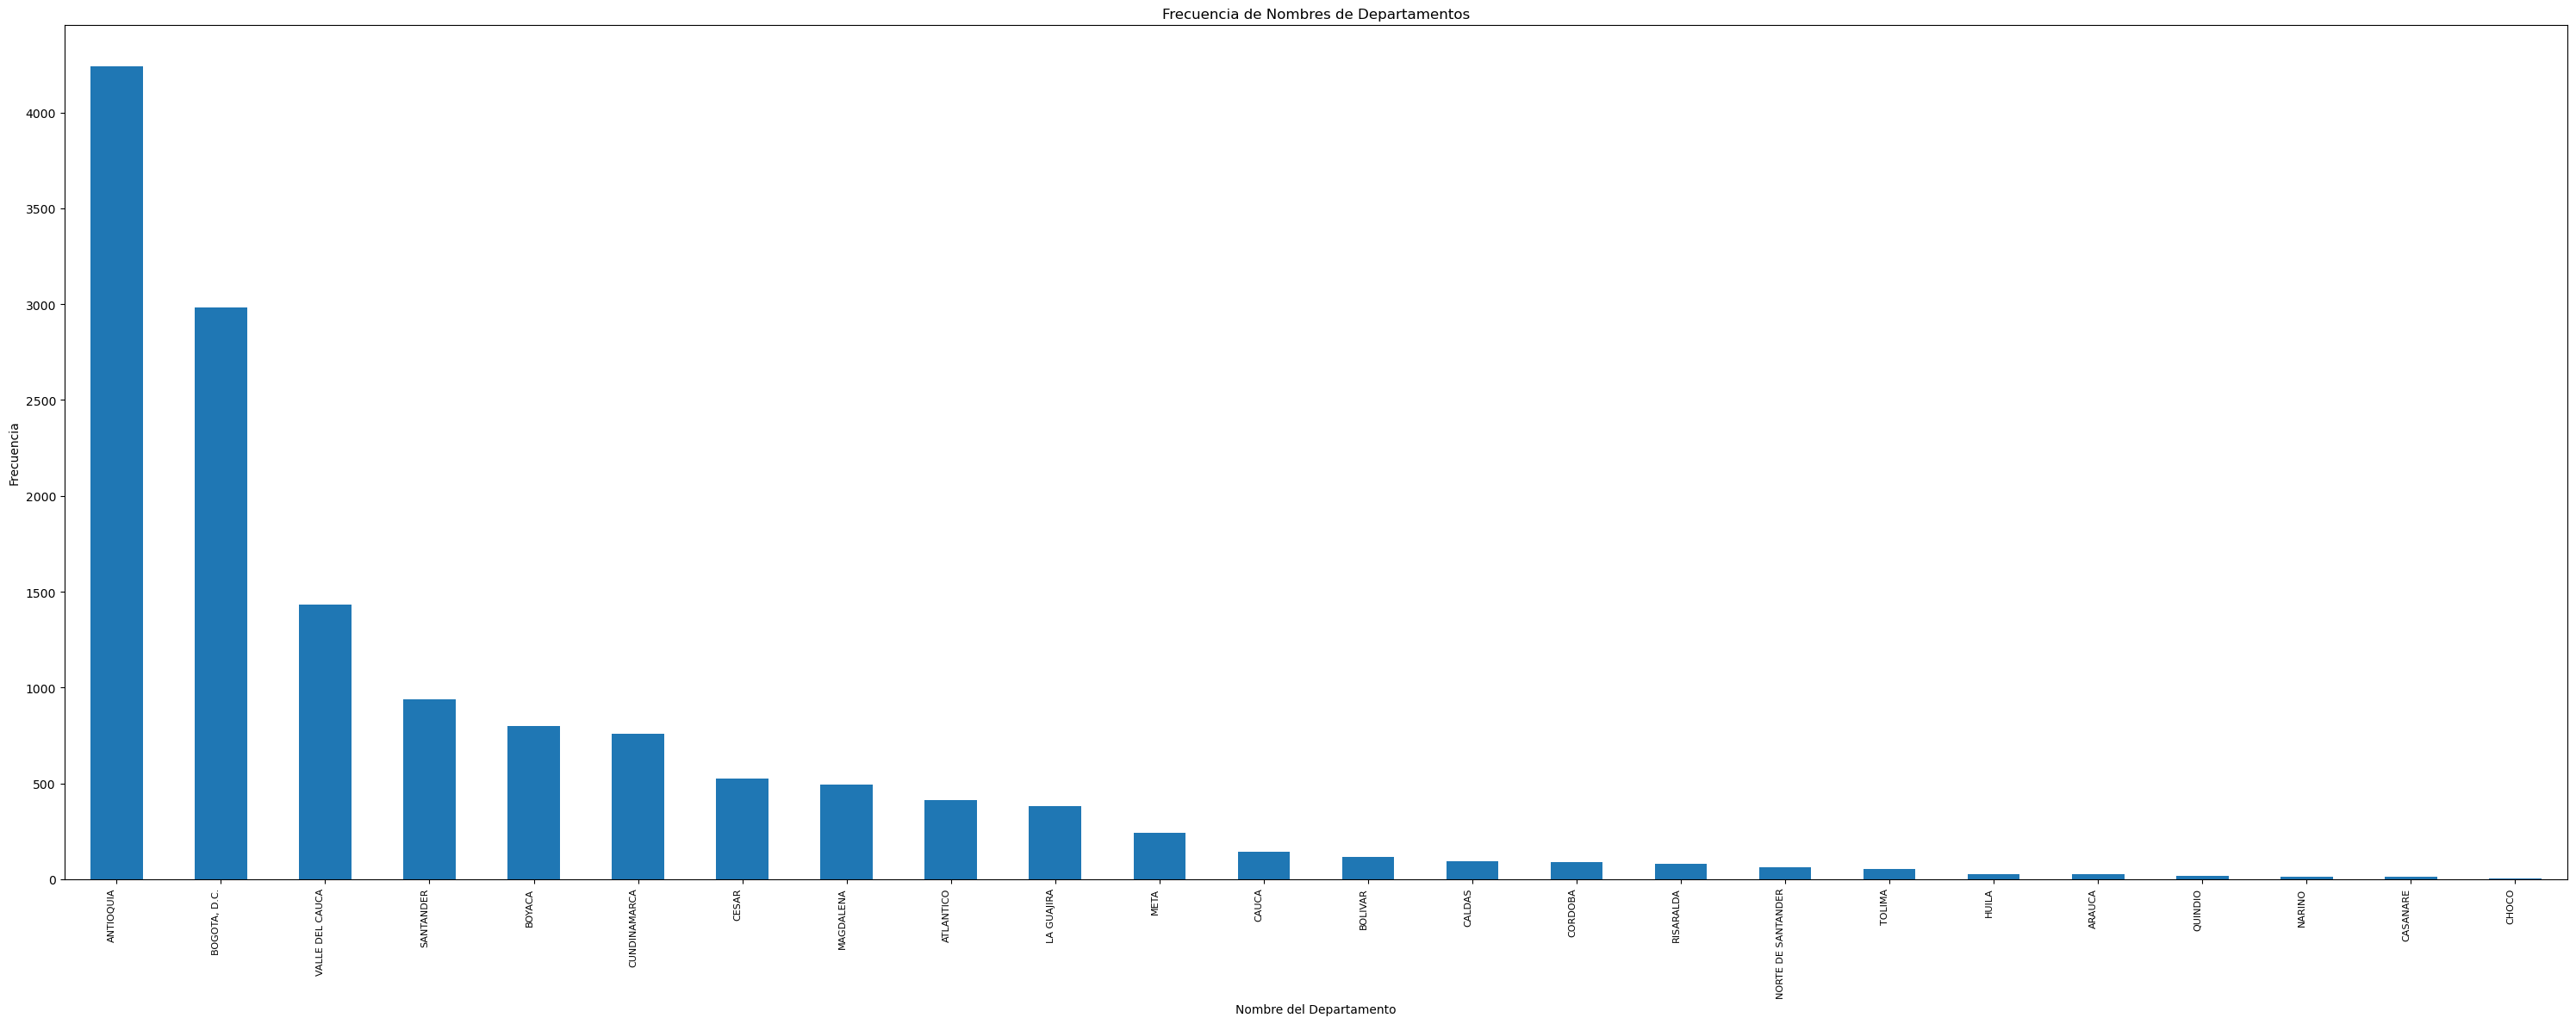

In [38]:
# Función para eliminar tildes de los nombres
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)])

# Normalizar los nombres de los departamentos para combinar entradas duplicadas
df['Nombre del Departamento'] = df['Nombre del Departamento'].str.strip().str.upper().apply(remove_accents)

# Contar la frecuencia de cada nombre del departamento
department_counts = df['Nombre del Departamento'].value_counts()

# Crear el gráfico de barras con un tamaño más ancho y ajustar la rotación de las etiquetas
plt.figure(figsize=(30, 12))
department_counts.plot(kind='bar')
plt.title('Frecuencia de Nombres de Departamentos')
plt.xlabel('Nombre del Departamento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotar las etiquetas 90 grados, alinearlas a la derecha y hacerlas más pequeñas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

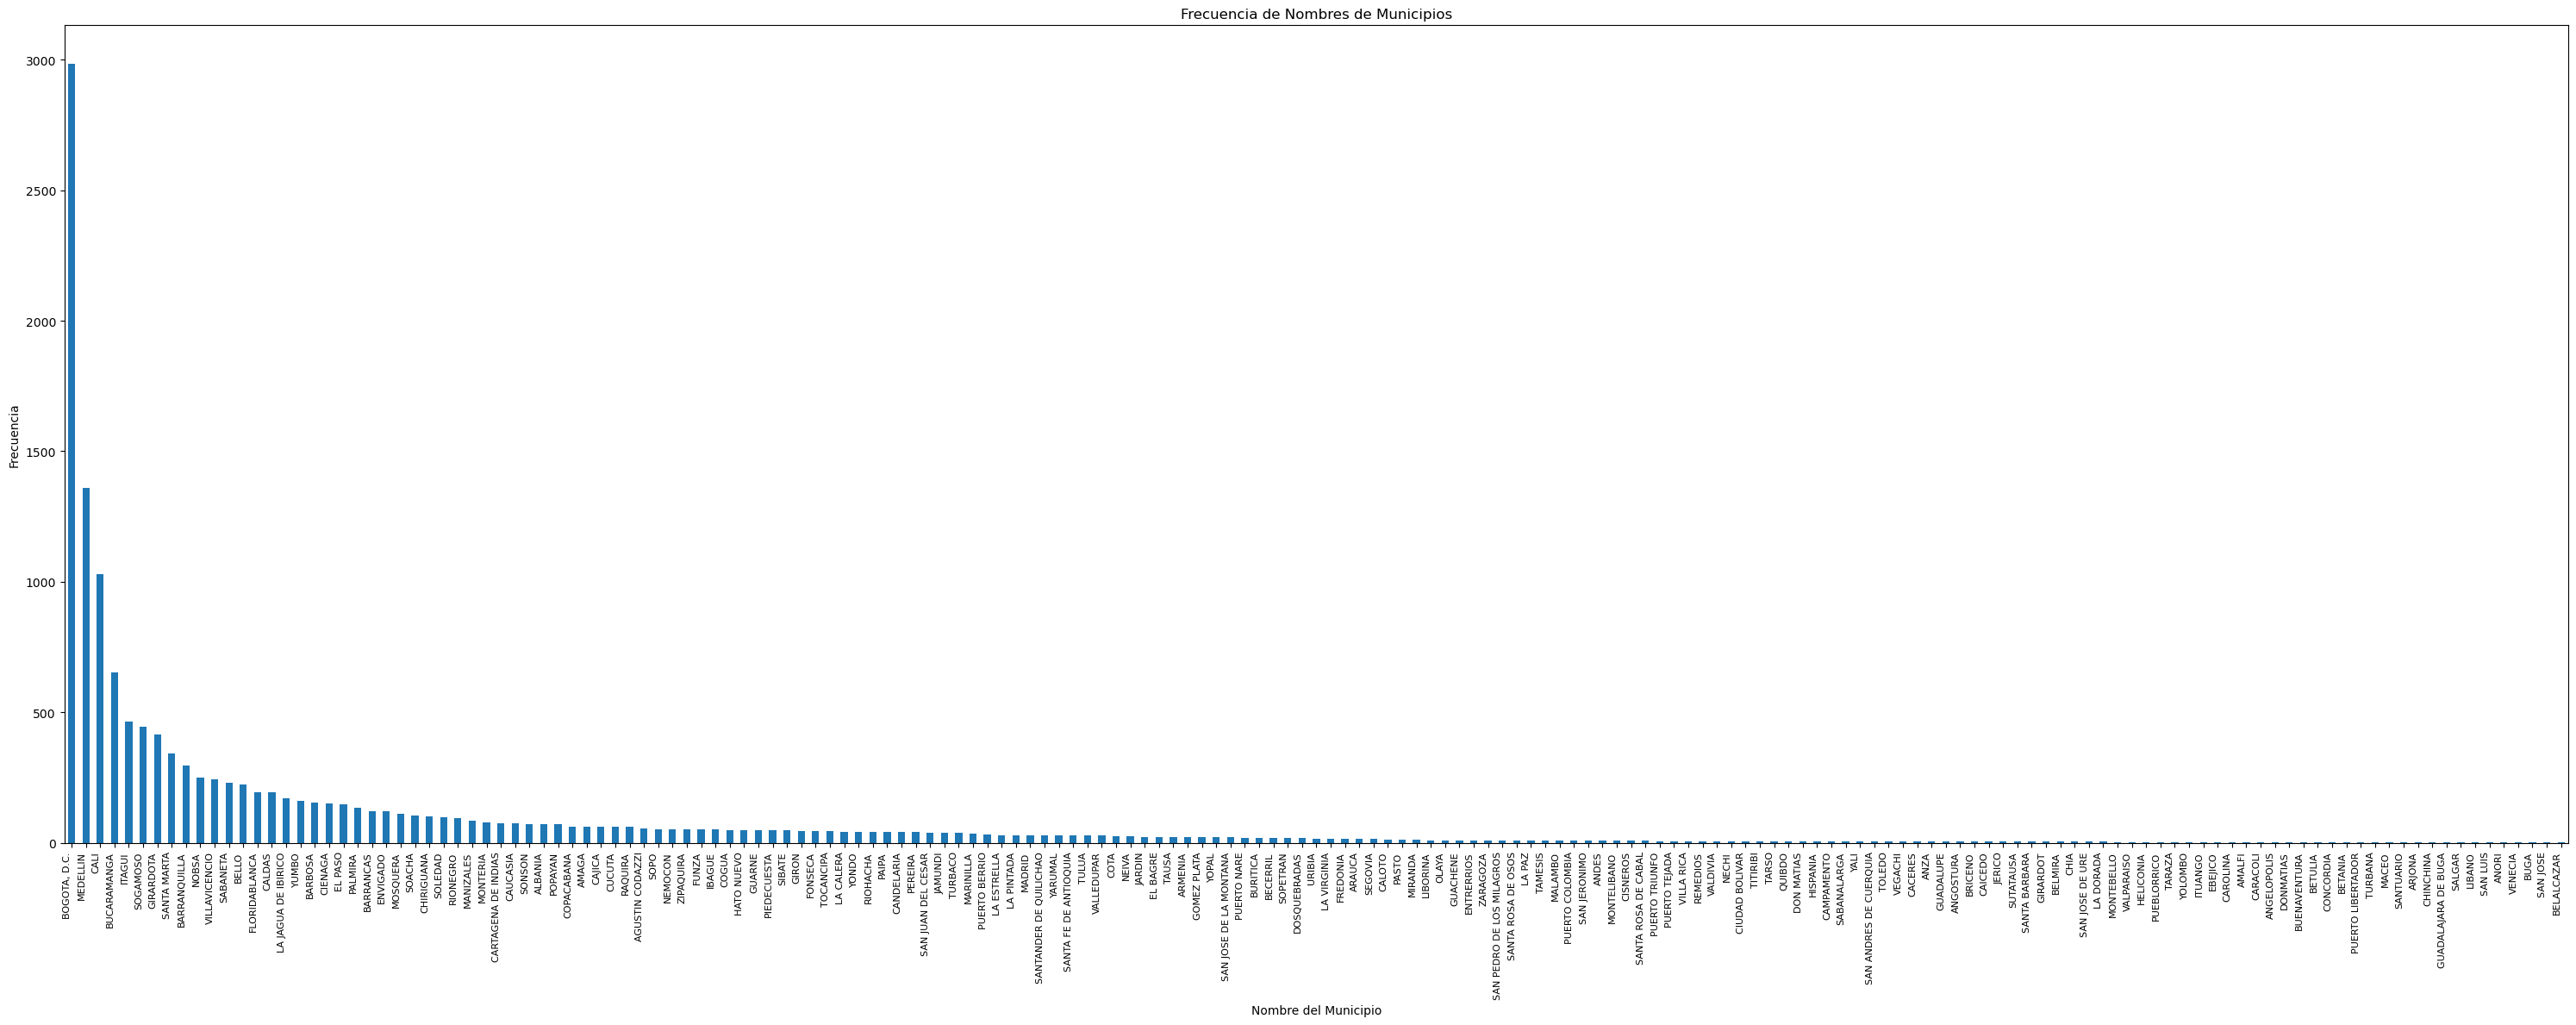

In [39]:
# Función para eliminar tildes de los nombres
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)])


# Normalizar los nombres de los municipios para combinar entradas duplicadas
df['Nombre del Municipio'] = df['Nombre del Municipio'].str.strip().str.upper().apply(remove_accents)

# Contar la frecuencia de cada nombre del municipio
municipality_counts = df['Nombre del Municipio'].value_counts()

# Crear el gráfico de barras con un tamaño más ancho y ajustar la rotación de las etiquetas
plt.figure(figsize=(30, 12))
municipality_counts.plot(kind='bar')
plt.title('Frecuencia de Nombres de Municipios')
plt.xlabel('Nombre del Municipio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotar las etiquetas 90 grados, alinearlas a la derecha y hacerlas más pequeñas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

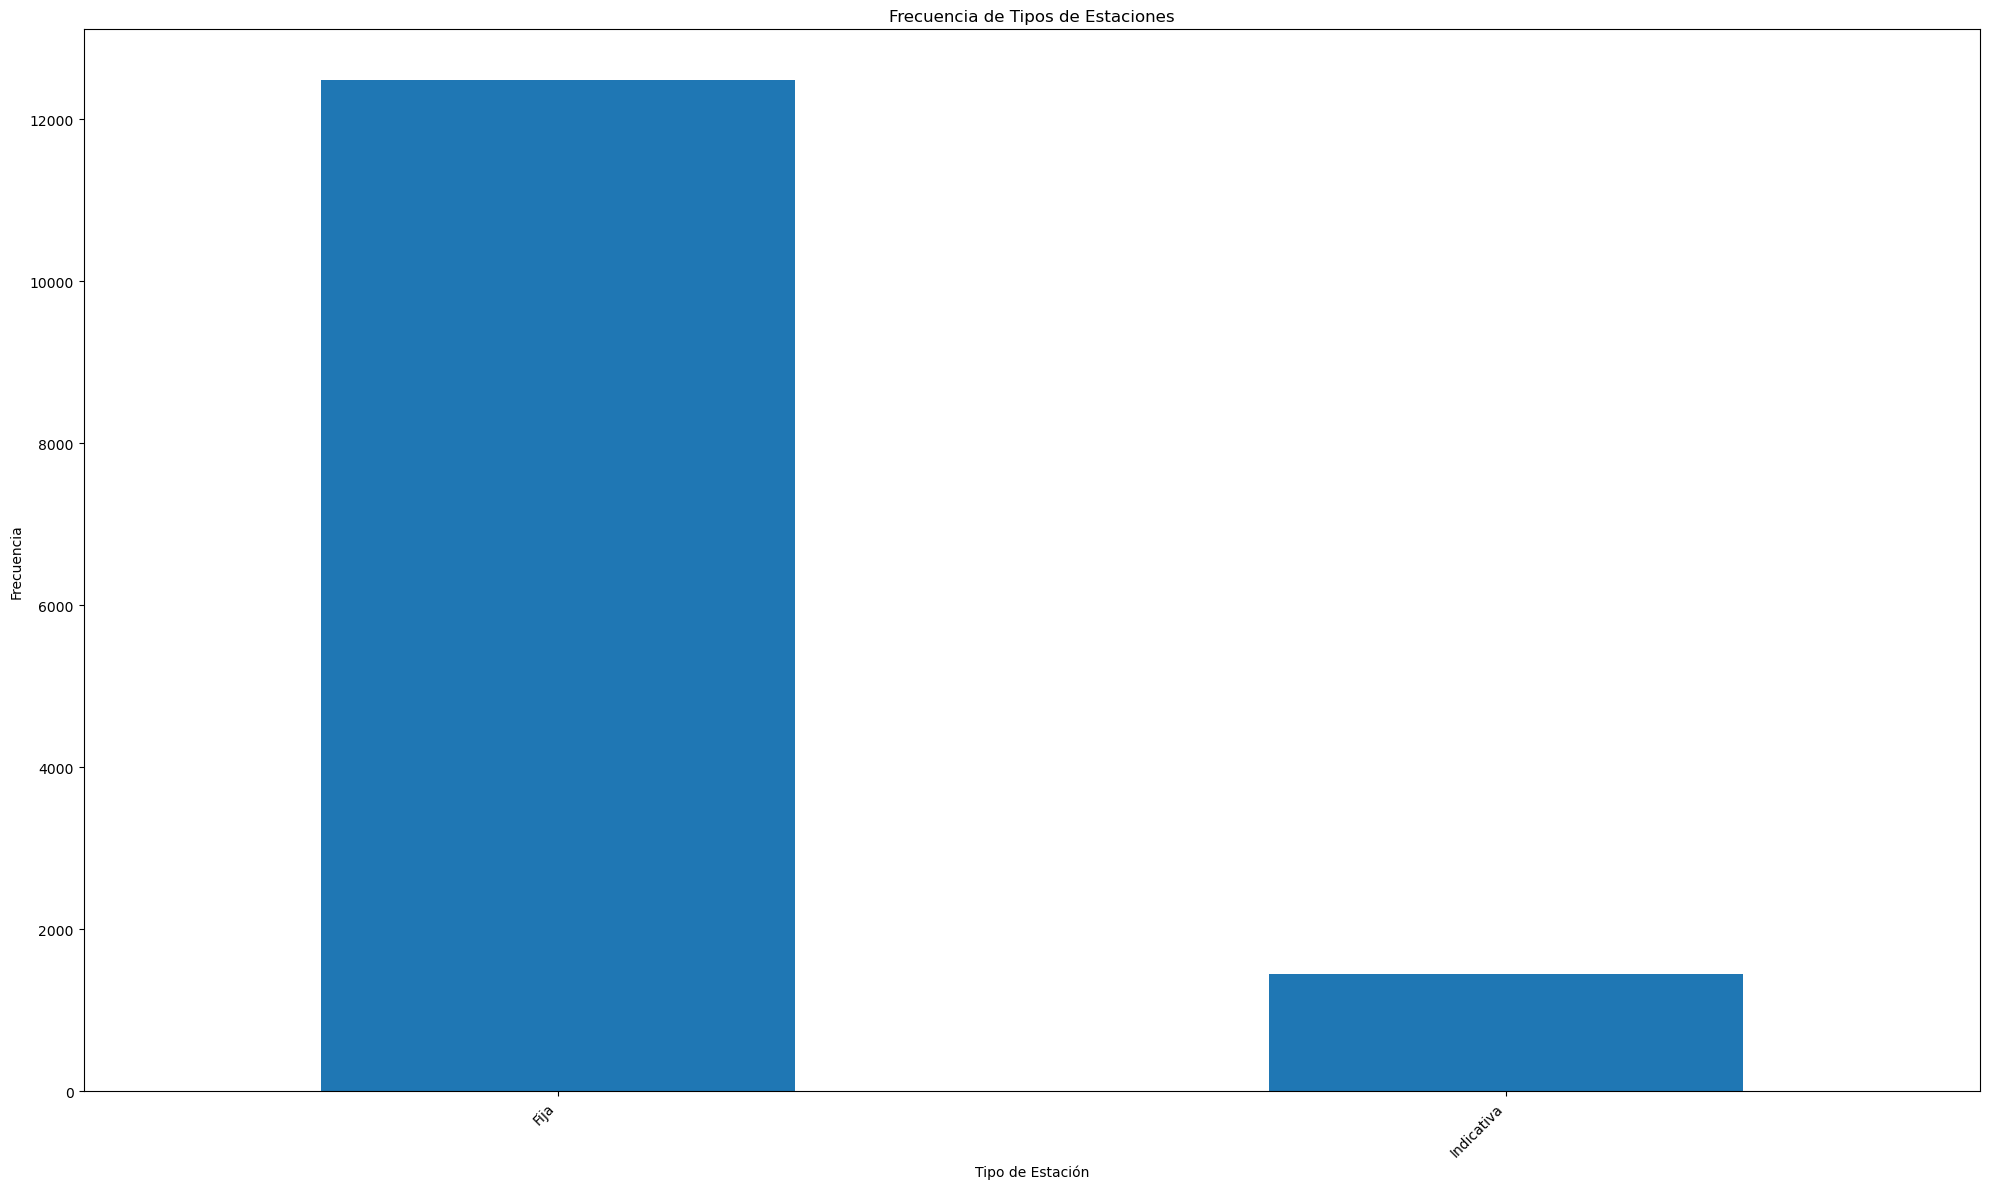

In [40]:
# Contar la frecuencia de cada tipo de estación
station_type_counts = df['Tipo de Estación'].value_counts()

# Crear el gráfico de barras con un tamaño más ancho y ajustar la rotación de las etiquetas
plt.figure(figsize=(20, 12))
station_type_counts.plot(kind='bar')
plt.title('Frecuencia de Tipos de Estaciones')
plt.xlabel('Tipo de Estación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar las etiquetas 45 grados, alinearlas a la derecha y hacerlas más pequeñas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

- **Valores Atipicos**

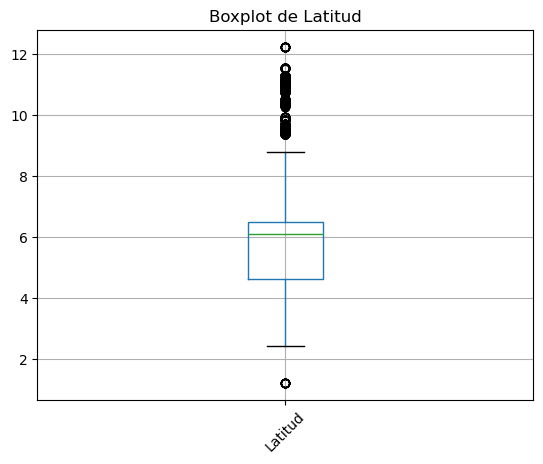

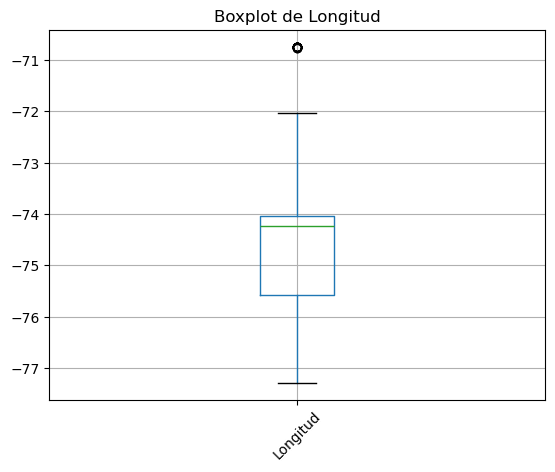

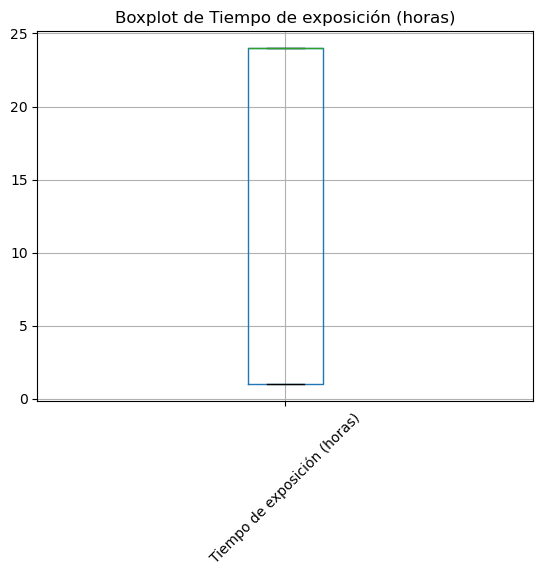

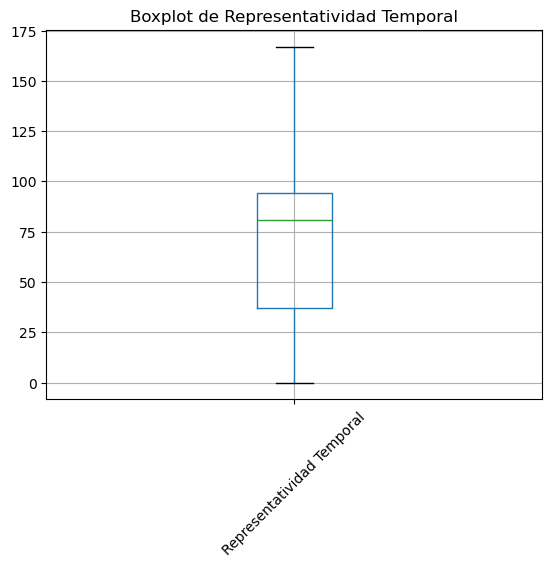

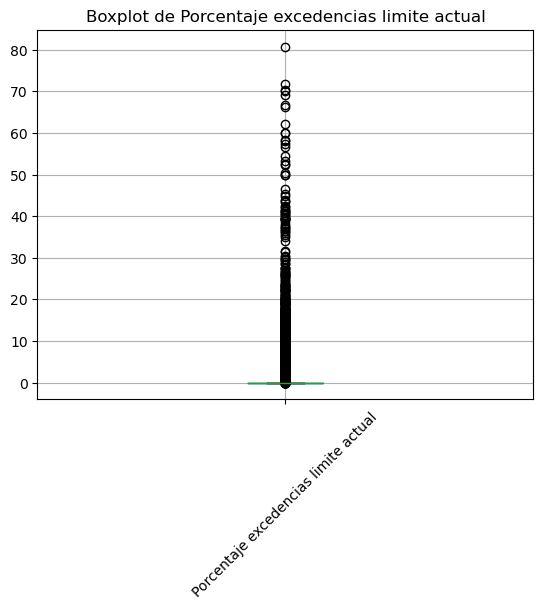

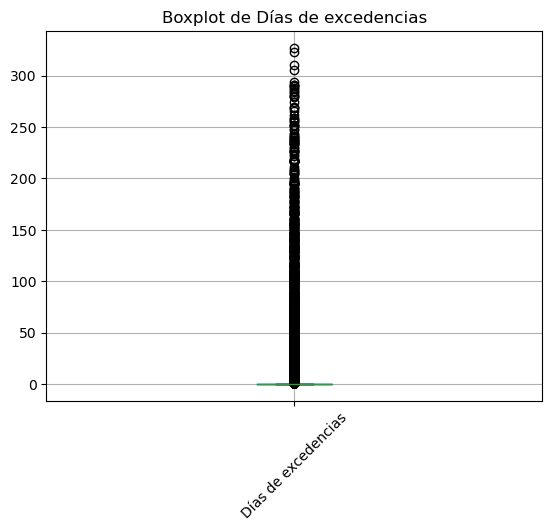

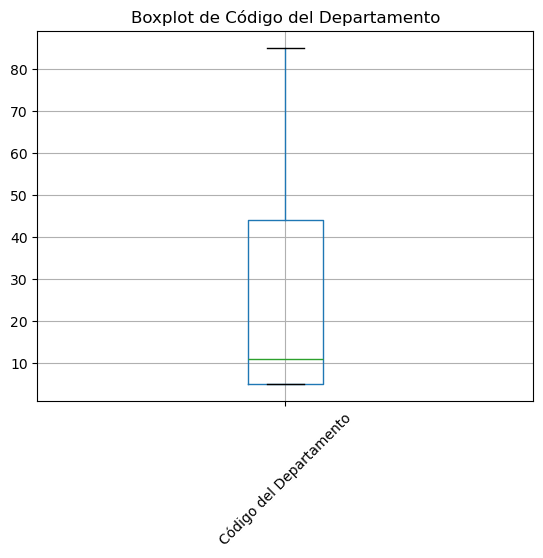

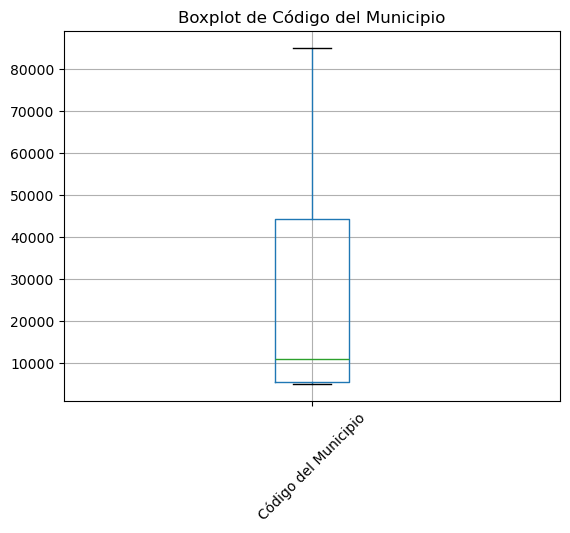

In [41]:
# Crear un boxplot para cada columna numérica en una página separada
for columna in columnas_numericas:
    plt.figure()
    df.boxplot(column=[columna])
    plt.title(f'Boxplot de {columna}')
    plt.xticks(rotation=45)
    plt.show()

- **Relacion entre los valores**


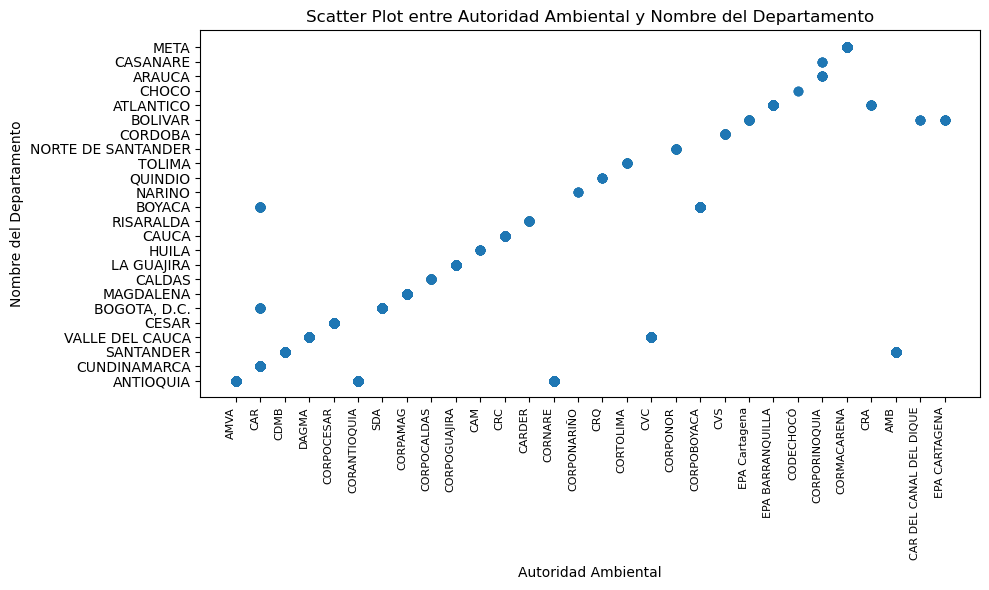

In [42]:
# Crear el Scatter Plot entre las variables 'Autoridad Ambiental' y 'Nombre del Departamento'
plt.figure(figsize=(10, 6))
plt.scatter(df['Autoridad Ambiental'], df['Nombre del Departamento'], alpha=0.5)
plt.title('Scatter Plot entre Autoridad Ambiental y Nombre del Departamento')
plt.xlabel('Autoridad Ambiental')
plt.ylabel('Nombre del Departamento')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotar las etiquetas de las autoridades ambientales 90 grados, alinearlas a la derecha y hacerlas más pequeñas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se podrian hacer algunas relaciones mas pero primero hay que convertir ciertos tipos de datos para poder realizar la relacion correctamente 

# 2. Valores faltantes y atípicos


A continuación, se realizarán los tratamientos para valores faltantes y atípicos. Anteriormente, se presentó una visión general de estos aspectos; en esta sección, se abordarán en mayor profundidad.

El código identifica y analiza los valores faltantes en el conjunto de datos, mostrando cuántos hay en cada columna y calculando el porcentaje de datos ausentes. Luego, se eliminan los registros con valores nulos y se compara el tamaño del dataset antes y después de esta limpieza para evaluar su impacto. Debido a que los valores faltantes en cada columna no son representativos, se opta por eliminar los registros afectados. Finalmente, se destacan las columnas más afectadas, lo que permite comprender mejor la magnitud del problema y tomar decisiones informadas para garantizar la calidad del análisis.

In [43]:
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

# Remove rows with missing values
df_cleaned = df.dropna()

# Display the shape after removal
print(f"\nShape before removing missing values: {df.shape}")
print(f"Shape after removing missing values: {df_cleaned.shape}")

# Calculate missing values percentage per column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Display columns with missing values and their percentages
print("\nPercentage of Missing Values per Column:")
print(missing_percentages[missing_percentages > 0])


Missing values per column:
ID Estacion                              0
Autoridad Ambiental                      0
Estación                                 0
Latitud                                  0
Longitud                                 0
Variable                                 0
Unidades                                 0
Tiempo de exposición (horas)             0
Año                                      0
Promedio                                 0
Suma                                     0
No. de datos                             0
Representatividad Temporal              74
Excedencias limite actual                0
Porcentaje excedencias limite actual     0
Mediana                                  0
Percentil 98                             0
Máximo                                   0
Fechas/horas del máximo                  0
Mínimo                                   0
Fechas/horas del mínimo                  0
Días de excedencias                      0
Código del Departamento   

Después de tratar los valores faltantes, se procede a identificar los valores atípicos en la base de datos. Para ello, se analizan únicamente las columnas numéricas y se emplean dos métodos para su detección. El primer método compara los valores con los rangos intercuartílicos para identificar datos que se desvían significativamente del resto. El segundo método evalúa la dispersión de los valores en función de su desviación estándar, detectando aquellos que se alejan demasiado de la media. Finalmente, se genera una representación visual mediante diagramas de caja, lo que permite observar de manera gráfica la presencia de valores extremos y su distribución dentro del conjunto de datos. Como resultado de este análisis, se identifica que las columnas correspondientes a los códigos de departamento y municipio han sido interpretadas como valores numéricos. Por ello, en la siguiente sección, dedicada a la transformación de datos, es necesario convertirlas en cadenas de texto para asegurar su correcto tratamiento


Outliers detected using IQR:
      ID Estacion Autoridad Ambiental              Estación    Latitud  \
44          9,049          CORPOCESAR        ZM11 MINGUILLO   9.940778   
101        26,179            CORPAMAG            AEROPUERTO  11.121185   
102        26,182            CORPAMAG            ALCATRACES  11.085883   
103        26,176            CORPAMAG              BATALLÓN  11.232561   
104        26,174            CORPAMAG               CAJAMAG  11.238926   
...           ...                 ...                   ...        ...   
13922      31,957    EPA BARRANQUILLA             JUAN MINA  10.956011   
13923       8,251                 CAR          PATIO BONITO   5.129059   
13926       8,251                 CAR          PATIO BONITO   5.129059   
13929      31,389         CORMACARENA              CATUMARE   4.108056   
13939       8,218                 SDA  CARVAJAL - SEVILLANA   4.595617   

        Longitud Variable Unidades  Tiempo de exposición (horas)    Año  \
44    

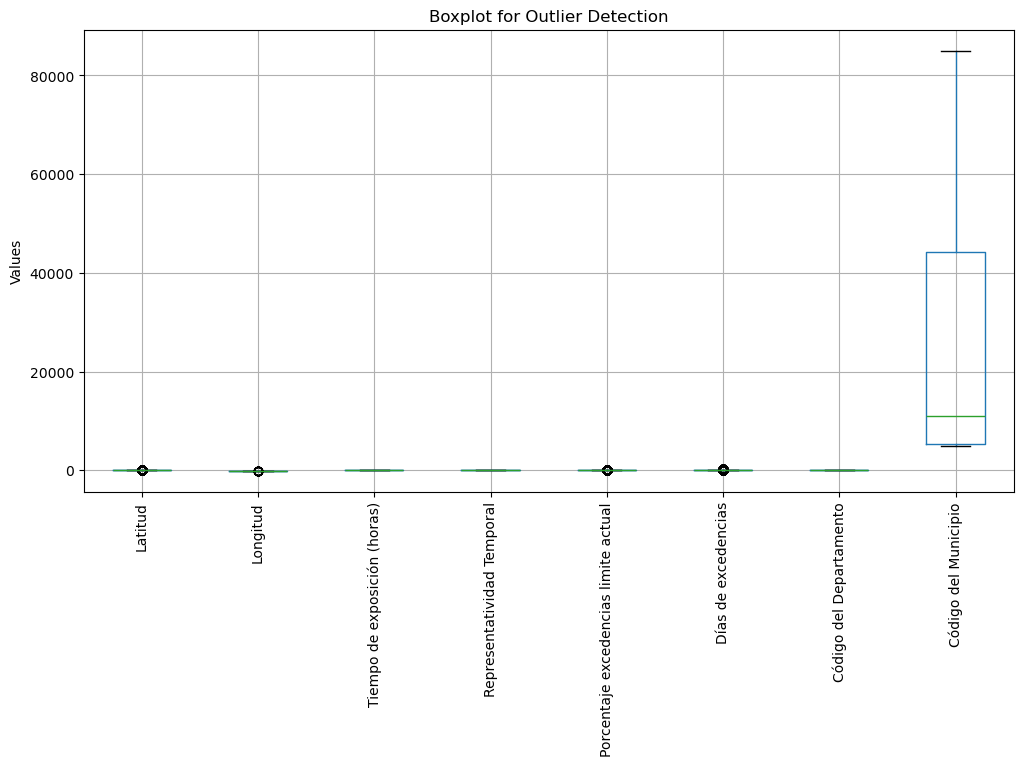

In [44]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['number'])

# IQR Method
Q1 = numeric_cols.quantile(0.25, numeric_only=True)
Q3 = numeric_cols.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
outliers_iqr = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

print("\nOutliers detected using IQR:")
print(df[outliers_iqr.any(axis=1)])

# Z-score Method
z_scores = stats.zscore(numeric_cols, nan_policy='omit')
outliers_zscore = (abs(z_scores) > 3)

print("\nOutliers detected using Z-score:")
print(df[outliers_zscore.any(axis=1)])

# Boxplot Visualization
plt.figure(figsize=(12, 6))
numeric_cols.boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.ylabel("Values")
plt.show()


Por lo anterior, se repite el análisis de valores atípicos excluyendo las columnas "Código del Departamento" y "Código del Municipio" para obtener resultados más precisos.


Outliers detected using IQR:
      ID Estacion Autoridad Ambiental              Estación    Latitud  \
44          9,049          CORPOCESAR        ZM11 MINGUILLO   9.940778   
101        26,179            CORPAMAG            AEROPUERTO  11.121185   
102        26,182            CORPAMAG            ALCATRACES  11.085883   
103        26,176            CORPAMAG              BATALLÓN  11.232561   
104        26,174            CORPAMAG               CAJAMAG  11.238926   
...           ...                 ...                   ...        ...   
13922      31,957    EPA BARRANQUILLA             JUAN MINA  10.956011   
13923       8,251                 CAR          PATIO BONITO   5.129059   
13926       8,251                 CAR          PATIO BONITO   5.129059   
13929      31,389         CORMACARENA              CATUMARE   4.108056   
13939       8,218                 SDA  CARVAJAL - SEVILLANA   4.595617   

        Longitud Variable Unidades  Tiempo de exposición (horas)    Año  \
44    

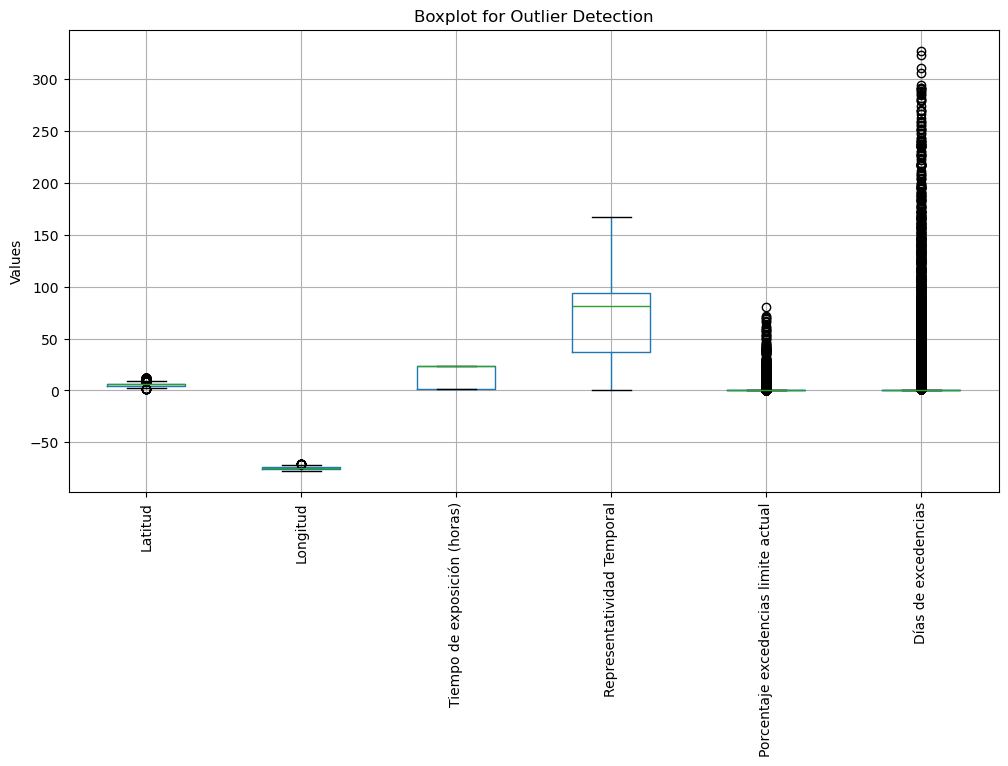

In [45]:
# Excluir las columnas específicas
columns_to_exclude = ["Código del Departamento", "Código del Municipio"]
numeric_cols = df.select_dtypes(include=['number']).drop(columns=columns_to_exclude, errors='ignore')

# IQR Method
Q1 = numeric_cols.quantile(0.25, numeric_only=True)
Q3 = numeric_cols.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
outliers_iqr = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

print("\nOutliers detected using IQR:")
print(df[outliers_iqr.any(axis=1)])

# Z-score Method
z_scores = stats.zscore(numeric_cols, nan_policy='omit')
outliers_zscore = (abs(z_scores) > 3)

print("\nOutliers detected using Z-score:")
print(df[outliers_zscore.any(axis=1)])

# Boxplot Visualization
plt.figure(figsize=(12, 6))
numeric_cols.boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.ylabel("Values")
plt.show()

No se aplicará ningún ajuste sobre los valores atípicos identificados, ya que se considera que no afectan significativamente el análisis y podrían contener información valiosa para la interpretación de los datos.

# 3. Transformación de datos 

In [46]:
# Mostrar los tipos de variables
tipos_de_variables = df.dtypes

# Mostrar los tipos de variables
print(tipos_de_variables)

ID Estacion                              object
Autoridad Ambiental                      object
Estación                                 object
Latitud                                 float64
Longitud                                float64
Variable                                 object
Unidades                                 object
Tiempo de exposición (horas)              int64
Año                                      object
Promedio                                 object
Suma                                     object
No. de datos                             object
Representatividad Temporal              float64
Excedencias limite actual                object
Porcentaje excedencias limite actual    float64
Mediana                                  object
Percentil 98                             object
Máximo                                   object
Fechas/horas del máximo                  object
Mínimo                                   object
Fechas/horas del mínimo                 

El cambio en los tipos de datos se realiza para asegurar una correcta interpretación y manipulación de la información. Las coordenadas de latitud y longitud se convierten a tipo objeto, ya que no se requiere realizar operaciones matemáticas sobre ellas, sino tratarlas como identificadores geográficos. Las variables originalmente en formato de texto que representan valores numéricos, como el promedio, la suma y los percentiles, se transforman a tipos numéricos para permitir análisis estadísticos. Además, los códigos de departamento y municipio se convierten en texto, ya que representan identificadores administrativos y no valores numéricos sobre los cuales se vayan a realizar cálculos. Estos cambios garantizan la coherencia de los datos y facilitan su procesamiento en futuras etapas del análisis.

In [2]:
# Lista de columnas a convertir
cols_to_convert = ["Promedio", "Suma", "No. de datos", "Excedencias limite actual",
                   "Mediana", "Percentil 98", "Máximo", "Mínimo"]

# Reemplazar comas, manejar valores nulos y convertir a float
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '', regex=True).replace('nan', np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convierte a float, ignorando errores

# Convertir columnas a sus tipos de datos correspondientes
df["Latitud"] = df["Latitud"].astype(str)
df["Longitud"] = df["Longitud"].astype(str)
df["Excedencias limite actual"] = df["Excedencias limite actual"].fillna(0).astype(int)
df["Código del Departamento"] = df["Código del Departamento"].astype(str)
df["Código del Municipio"] = df["Código del Municipio"].astype(str)

# Mostrar tipos de datos después de la conversión
print(df.dtypes)

ID Estacion                              object
Autoridad Ambiental                      object
Estación                                 object
Latitud                                  object
Longitud                                 object
Variable                                 object
Unidades                                 object
Tiempo de exposición (horas)              int64
Año                                      object
Promedio                                float64
Suma                                    float64
No. de datos                              int64
Representatividad Temporal              float64
Excedencias limite actual                 int64
Porcentaje excedencias limite actual    float64
Mediana                                 float64
Percentil 98                            float64
Máximo                                  float64
Fechas/horas del máximo                  object
Mínimo                                  float64
Fechas/horas del mínimo                 

## Normalización de variables

### Normalización de variables númericas

En este código, se aplican dos métodos de normalización a las variables numéricas del DataFrame: Min-Max Scaling y Estandarización (Z-score normalization).

El Min-Max Scaling transforma los valores de cada columna a un rango entre 0 y 1, lo que es útil cuando se requiere mantener la proporcionalidad de los datos sin alterar su distribución. Por otro lado, la Estandarización Z-score reescala los valores de cada columna para que tengan una media de 0 y una desviación estándar de 1, lo que es especialmente útil cuando los datos contienen valores atípicos o distribuciones con diferentes escalas.

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar las columnas numéricas para normalización
numerical_cols = [
    "Tiempo de exposición (horas)", "Promedio", "Suma", "No. de datos",
    "Representatividad Temporal", "Excedencias limite actual",
    "Porcentaje excedencias limite actual", "Mediana", "Percentil 98",
    "Máximo", "Mínimo", "Días de excedencias"
]

# Inicializar escaladores
minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()

# Aplicar Min-Max Scaling
df_minmax = df.copy()
df_minmax[numerical_cols] = minmax_scaler.fit_transform(df_minmax[numerical_cols])

# Aplicar Z-score Normalization
df_zscore = df.copy()
df_zscore[numerical_cols] = zscore_scaler.fit_transform(df_zscore[numerical_cols])

# Mostrar resultados
print("Datos normalizados con Min-Max Scaling:")
print(df_minmax[numerical_cols].head())

print("\nDatos normalizados con Z-score:")
print(df_zscore[numerical_cols].head())


Datos normalizados con Min-Max Scaling:
   Tiempo de exposición (horas)  Promedio      Suma  No. de datos  \
0                           0.0  0.077913  0.017078      0.160556   
1                           1.0  0.078095  0.000796      0.006604   
2                           0.0  0.001184  0.000016      0.008312   
3                           0.0  0.196012  0.154888      0.514120   
4                           1.0  0.196012  0.006448      0.021294   

   Representatividad Temporal  Excedencias limite actual  \
0                    0.095808                        0.0   
1                    0.095808                        0.0   
2                    0.005988                        0.0   
3                    0.311377                        0.0   
4                    0.311377                        0.0   

   Porcentaje excedencias limite actual   Mediana  Percentil 98    Máximo  \
0                                   0.0  0.068354      0.008938  0.000490   
1                             

### Conversión de variables categoricas


En este caso, no vimos necesario aplicar Label Encoding ni One-Hot Encoding, ya que consideramos que para el análisis era más conveniente mantener las variables categóricas en su formato original. En su lugar, aplicamos feature engineering para añadir una columna con variables de tipo dummy, permitiendo separar fácilmente los municipios que presentaron días de excedencia de aquellos que no. Esto facilita futuros análisis sin introducir complejidad innecesaria y mantiene la interpretación directa de los datos.

In [4]:
df["Municipio_Excedencia"] = df["Días de excedencias"].apply(lambda x: 1 if x > 0 else 0)

# Guardar el resultado en el mismo archivo CSV
df.to_csv("CALIDAD_DEL_AIRE_EN_COLOMBIA__PROMEDIO_ANUAL__20250220.csv", index=False)

print("Ejemplos sin excedencia:")
print(df[df["Municipio_Excedencia"] == 0].head(5))

print("Ejemplos con excedencia:")
print(df[df["Municipio_Excedencia"] == 1].head(5))

Ejemplos sin excedencia:
   ID Estacion Autoridad Ambiental            Estación   Latitud   Longitud  \
0         9020                AMVA  I.E. COL. COLOMBIA  6.378517 -75.443986   
1         9020                AMVA  I.E. COL. COLOMBIA  6.378517 -75.443986   
2         9020                AMVA  I.E. COL. COLOMBIA  6.378517 -75.443986   
3         9020                AMVA  I.E. COL. COLOMBIA  6.378517 -75.443986   
4         9020                AMVA  I.E. COL. COLOMBIA  6.378517 -75.443986   

   Variable Unidades  Tiempo de exposición (horas)   Año  Promedio  ...  \
0   DViento      deg                             1  2011     256.8  ...   
1   DViento      deg                            24  2011     257.4  ...   
2  PLiquida       mm                             1  2011       4.0  ...   
3         P     mmHg                             1  2011     645.9  ...   
4         P     mmHg                            24  2011     645.9  ...   

                             Fechas/horas del mín

# 4. Pruebas estadísticas y formulación de hipótesis

A continuación se va a formular la pregunta de invetigación y se dara toda la información pertinente para comprender la seleccion de variables durante las pruebas estadísticas y de hipotesis. Aunque según el formato se debia hacer mas abajo se considera pertinente mencionarlo en este momento para la comprensión del analisis. 

**Pregunta de Investigación: ¿En los municipios pequeños hay menos días de excedencia debido a que tienen una menor población?**

La calidad del aire es un tema de gran relevancia para la salud pública y el medio ambiente. En áreas urbanas densamente pobladas, es común observar mayores niveles de contaminación debido a la concentración de actividades industriales, tráfico vehicular y otras fuentes de emisiones. Por otro lado, se presume que en municipios pequeños, con menor densidad poblacional, la calidad del aire podría ser mejor y, por ende, habría menos días de excedencia de los límites establecidos para contaminantes.

Para analizar la relación entre el tamaño de la población en los municipios pequeños y los días de excedencia, las siguientes variables de la base de datos son relevantes:

Nombre del Municipio: Identifica el municipio específico.
Días de Excedencias: Número de días en los que se excedieron los límites establecidos.
 
y ademas se va a incluir la variable Municipio_Excedencia  permitiendo separar fácilmente los municipios que presentaron días de excedencia de aquellos que no. De esta manera se relacionara la variable población con la variable días de excedencia.

**1 Comprobar la normalidad**

En el análisis estadístico, es fundamental verificar si los datos siguen una distribución normal antes de aplicar ciertas pruebas estadísticas. Muchas pruebas paramétricas, como el T-test y ANOVA, asumen que los datos son normales. Si esta suposición no se cumple, los resultados de estas pruebas pueden ser inválidos. Por lo tanto, vamos comprobar la normalidad de los datos, lo que nos ayudara a tener claridad si podemos usar estas pruebas o si necesitamos recurrir a pruebas no paramétricas.

Para comprobar la normalidad de los datos, utilizaremos las siguientes pruebas:

- **Prueba de Shapiro-Wilk**
- **Prueba de Kolmogorov-Smirnov (K-S)**
- **Gráfico Q-Q (Quantile-Quantile)**



- **Prueba de Shapiro-Wilk**

In [4]:
import pandas as pd
import scipy.stats as stats


# Seleccionar las columnas numéricas para comprobar la normalidad
numerical_cols = [
    "Excedencias limite actual","Porcentaje excedencias limite actual",  "Días de excedencias"
]

# Realizar la prueba de Shapiro-Wilk para cada columna numérica
shapiro_results = {}
for col in numerical_cols:
    shapiro_test = stats.shapiro(df[col].dropna())
    shapiro_results[col] = {"Estadistica": shapiro_test.statistic, "p-value": shapiro_test.pvalue}

# Mostrar resultados de la prueba de Shapiro-Wilk para cada columna numérica
for col, result in shapiro_results.items():
    print(f"Shapiro-Wilk Test for {col}: Estadistica={result['Estadistica']}, p-value={result['p-value']}")
    if result['p-value'] < 0.05:
        print(f"El valor-p para {col} es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que los datos son normales.")
    else:
        print(f"El valor-p para {col} es mayor o igual a 0.05, por lo tanto no rechazamos la hipótesis nula de que los datos son normales.")

Shapiro-Wilk Test for Excedencias limite actual: Estadistica=0.17122703620206303, p-value=7.799302473006685e-120
El valor-p para Excedencias limite actual es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que los datos son normales.
Shapiro-Wilk Test for Porcentaje excedencias limite actual: Estadistica=0.2301857079809999, p-value=7.92216579764046e-118
El valor-p para Porcentaje excedencias limite actual es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que los datos son normales.
Shapiro-Wilk Test for Días de excedencias: Estadistica=0.25547639129293676, p-value=6.332465456165199e-117
El valor-p para Días de excedencias es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que los datos son normales.


- **Prueba de Kolmogorov-Smirnov**

In [12]:
import pandas as pd
import scipy.stats as stats


# Seleccionar las columnas numéricas relacionadas con la pregunta de investigación
numerical_cols = [
    "Días de excedencias", 
    "Excedencias limite actual", 
    "Porcentaje excedencias limite actual"
]

# Realizar la prueba de Kolmogorov-Smirnov para cada columna numérica
ks_results = {}
for col in numerical_cols:
    ks_test = stats.kstest(df[col].dropna(), 'norm')
    ks_results[col] = {"Statistic": ks_test.statistic, "p-value": ks_test.pvalue}

# Mostrar resultados de la prueba de Kolmogorov-Smirnov para cada columna numérica
for col, result in ks_results.items():
    print(f"Kolmogorov-Smirnov Test for {col}: Statistic={result['Statistic']}, p-value={result['p-value']}")
    if result['p-value'] < 0.05:
        print(f"El valor-p para {col} es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que los datos son normales.")
    else:
        print(f"El valor-p para {col} es mayor o igual a 0.05, por lo tanto no rechazamos la hipótesis nula de que los datos son normales.")

Kolmogorov-Smirnov Test for Días de excedencias: Statistic=0.5, p-value=0.0
El valor-p para Días de excedencias es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que los datos son normales.
Kolmogorov-Smirnov Test for Excedencias limite actual: Statistic=0.5, p-value=0.0
El valor-p para Excedencias limite actual es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que los datos son normales.
Kolmogorov-Smirnov Test for Porcentaje excedencias limite actual: Statistic=0.5, p-value=0.0
El valor-p para Porcentaje excedencias limite actual es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que los datos son normales.


Un p-valor de 0.0 en las pruebas estadísticas, como la prueba de Kolmogorov-Smirnov, indica que la probabilidad de que los datos sigan una distribución normal es extremadamente baja. En otras palabras, los datos se desvían significativamente de una distribución normal.

Con un tamaño de muestra grande (13,940 filas), las pruebas de normalidad son muy sensibles y pueden detectar incluso pequeñas desviaciones de la normalidad. Esto puede resultar en p-valores muy bajos, incluso cercanos a 0.0.

-**Gráfico Q-Q (Quantile-Quantile)**

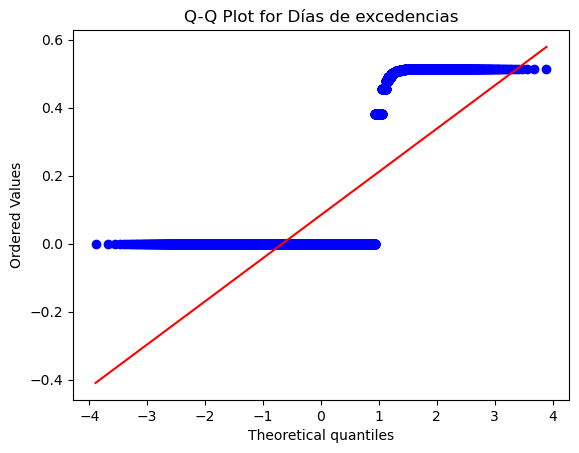

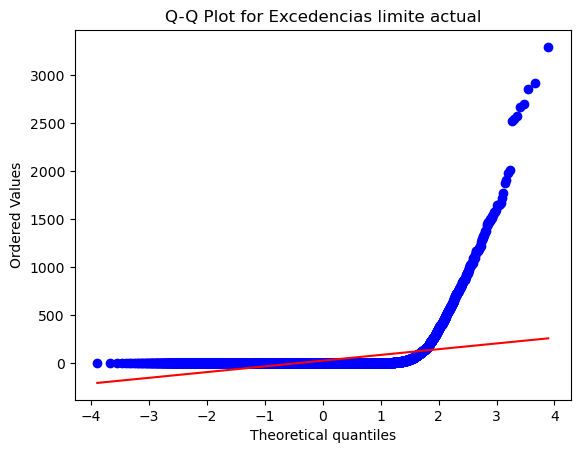

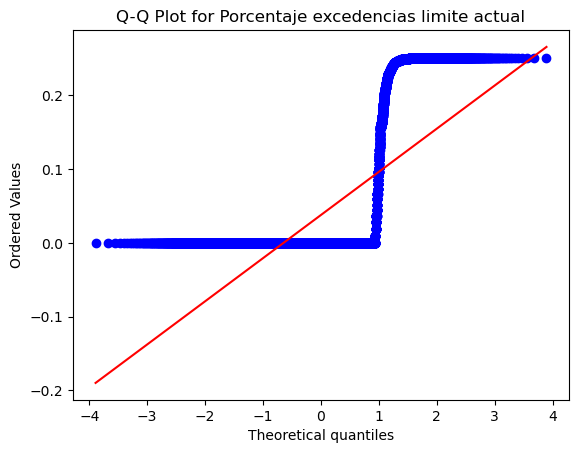

In [13]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


# Seleccionar las columnas numéricas relacionadas con la pregunta de investigación
numerical_cols = [
    "Días de excedencias", 
    "Excedencias limite actual", 
    "Porcentaje excedencias limite actual"
]

# Realizar gráficos Q-Q para cada columna numérica
for col in numerical_cols:
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.show()

El gráfico Q-Q muestra una dispersión significativa de los puntos en comparación con la línea de referencia, lo que sugiere que los datos de "Días de excedencias", "Excedencias limite actual" y "Porcentaje de limites actual" no se ajustan a una distribución normal. Se observa una desviación notable en las colas del gráfico. Además, la falta de alineación de los puntos a lo largo de la línea diagonal sugiere que los datos no siguen una distribución normal estándar. 

**2 Evaluación de homocedasticidad**

Evaluar la homocedasticidad es esencial por varias razones:
-La homocedasticidad garantiza que los errores del modelo de regresión tienen una varianza constante.
-La homocedasticidad asegura que las pruebas de significancia estadística, como el T-test y ANOVA, sean válidas.


-**Prueba de Levene**

In [15]:
import pandas as pd
import scipy.stats as stats


# Seleccionar las columnas numéricas relacionadas con la pregunta de investigación
numerical_cols = [
    "Días de excedencias", 
    "Excedencias limite actual", 
    "Porcentaje excedencias limite actual"
]

# Realizar la prueba de Levene para cada columna numérica
levene_results = {}
for col in numerical_cols:
    # Agrupar los datos por municipio para realizar la prueba de Levene
    grouped_data = [group.dropna() for name, group in df.groupby('Nombre del Municipio')[col]]
    if len(grouped_data) > 1:  # Asegurarse de que hay al menos dos grupos
        levene_test = stats.levene(*grouped_data)
        levene_results[col] = {"Statistic": levene_test.statistic, "p-value": levene_test.pvalue}

# Mostrar resultados de la prueba de Levene para cada columna numérica
for col, result in levene_results.items():
    print(f"Levene Test for {col}: Statistic={result['Statistic']}, p-value={result['p-value']}")
    if result['p-value'] < 0.05:
        print(f"El valor-p para {col} es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que las varianzas son iguales (homocedasticidad).")
    else:
        print(f"El valor-p para {col} es mayor o igual a 0.05, por lo tanto no rechazamos la hipótesis nula de que las varianzas son iguales (homocedasticidad).")

Levene Test for Días de excedencias: Statistic=4.282003254909513, p-value=1.4532718802999551e-80
El valor-p para Días de excedencias es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que las varianzas son iguales (homocedasticidad).
Levene Test for Excedencias limite actual: Statistic=2.863766877212105, p-value=2.104538382120009e-37
El valor-p para Excedencias limite actual es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que las varianzas son iguales (homocedasticidad).
Levene Test for Porcentaje excedencias limite actual: Statistic=4.957175033709904, p-value=1.1660077110727372e-102
El valor-p para Porcentaje excedencias limite actual es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que las varianzas son iguales (homocedasticidad).



- **Prueba de Breusch-Pagan**

In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


# Seleccionar las columnas numéricas relacionadas con la pregunta de investigación
numerical_cols = [
    "Días de excedencias", 
    "Excedencias limite actual", 
    "Porcentaje excedencias limite actual"
]

# Definir la variable dependiente y las variables independientes
y = df["Días de excedencias"].dropna()
X = df[["Excedencias limite actual", "Porcentaje excedencias limite actual"]].dropna()

# Asegurarse de que las filas coinciden entre y y X
X = X.loc[y.index]

# Añadir una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)

# Mostrar resultados de la prueba de Breusch-Pagan
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))

print("Breusch-Pagan Test Results:")
for key, value in results.items():
    print(f"{key}: {value}")

# Interpretación de los resultados
if results['p-value'] < 0.05:
    print("El valor-p es menor a 0.05, por lo tanto rechazamos la hipótesis nula de homocedasticidad. Hay evidencia de heterocedasticidad.")
else:
    print("El valor-p es mayor o igual a 0.05, por lo tanto no rechazamos la hipótesis nula de homocedasticidad. No hay evidencia de heterocedasticidad.")

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 168.33349601024662
p-value: 2.7979875752654254e-37
f-value: 85.17719817042968
f p-value: 1.7071318910252774e-37
El valor-p es menor a 0.05, por lo tanto rechazamos la hipótesis nula de homocedasticidad. Hay evidencia de heterocedasticidad.


La heterocedasticidad significa que la variabilidad de los días de excedencia no es constante entre los diferentes municipios. En otras palabras, la dispersión de los días de excedencia varía significativamente de un municipio a otro.

**3. Formular y contrastar hipótesis**

**Pregunta de Investigación: ¿En los municipios pequeños hay menos días de excedencia debido a que tienen una menor población?**

La calidad del aire es un tema de gran relevancia para la salud pública y el medio ambiente. En áreas urbanas densamente pobladas, es común observar mayores niveles de contaminación debido a la concentración de actividades industriales, tráfico vehicular y otras fuentes de emisiones. Por otro lado, se presume que en municipios pequeños, con menor densidad poblacional, la calidad del aire podría ser mejor y, por ende, habría menos días de excedencia de los límites establecidos para contaminantes.

**Plantee las hipótesis nula (H0) y alternativa (H1).**
H0: En los municipios pequeños, el número de días de excedencia no es significativamente diferente al de los municipios más grandes.
H1: En los municipios pequeños, el número de días de excedencia es significativamente menor que en los municipios más grandes.

**Seleccione la prueba adecuada**
Dado que los datos no se distribuyen normalmente (como se determinó mediante las pruebas de normalidad), es necesario utilizar una prueba no paramétrica. La prueba de Mann-Whitney U es una prueba no paramétrica que se utiliza para comparar dos grupos independientes cuando no se puede asumir la normalidad de los datos, por lo tanto: 

-No Requiere Asumir Normalidad: La prueba de Mann-Whitney U no asume que los datos sigan una distribución normal, lo que la hace adecuada para datos que no cumplen con esta condición.
-Comparación de Dos Grupos Independientes:La prueba de Mann-Whitney U es ideal para comparar dos grupos independientes. En este caso, los grupos son los municipios clasificados como "Pequeño" y "Grande" en función de la variable Municipio_Excedencia.
-Manejo de Diferentes Tamaños de Muestra:La prueba de Mann-Whitney U puede manejar tamaños de muestra diferentes entre los dos grupos, lo que es útil si hay una disparidad en el número de municipios pequeños y grandes.
-Robustez a Outliers:La prueba de Mann-Whitney U es menos sensible a outliers en comparación con pruebas paramétricas como el T-test, lo que la hace más robusta para datos con valores atípicos.



**Prueba de Hipotesis**
Teniendo en cuenta la logica de que si son municipios pequeños no hay nivel de excedencia , en cambio en municipios grandes si hay nivel de excedencia , se puede categorizar los municipios de la siguiente manera: 

In [5]:
import pandas as pd
import scipy.stats as stats


# Clasificar municipios como 'Grande' si hay excedencia y 'Pequeño' si no hay excedencia
df['Clasificacion_Municipio'] = df['Municipio_Excedencia'].apply(lambda x: 'Grande' if x == 1 else 'Pequeño')

# Mostrar las primeras filas del DataFrame para verificar la clasificación
print(df[['Nombre del Municipio', 'Municipio_Excedencia', 'Clasificacion_Municipio']].head())

# Filtrar los valores de días de excedencia para cada grupo
grande = df[df['Clasificacion_Municipio'] == 'Grande']['Municipio_Excedencia']
pequeño = df[df['Clasificacion_Municipio'] == 'Pequeño']['Municipio_Excedencia']

# Verificar que las listas no estén vacías antes de la prueba estadística
if grande.empty or pequeño.empty:
    print("Error: Uno de los grupos está vacío, no se puede realizar la prueba de Mann-Whitney U.")
else:
    # Realizar la prueba de Mann-Whitney U
    mannwhitney_test = stats.mannwhitneyu(grande, pequeño, alternative='greater')
    print("\nPrueba de Mann-Whitney U:\n", mannwhitney_test)

    # Interpretación del resultado
    if mannwhitney_test.pvalue > 0.05:
        print("No se rechaza la hipótesis nula: No hay una diferencia significativa en el número de días de excedencia entre municipios pequeños y grandes.")
    else:
        print("Se rechaza la hipótesis nula: Hay una diferencia significativa en el número de días de excedencia entre municipios pequeños y grandes.")


  Nombre del Municipio  Municipio_Excedencia Clasificacion_Municipio
0            GIRARDOTA                     0                 Pequeño
1            GIRARDOTA                     0                 Pequeño
2            GIRARDOTA                     0                 Pequeño
3            GIRARDOTA                     0                 Pequeño
4            GIRARDOTA                     0                 Pequeño

Prueba de Mann-Whitney U:
 MannwhitneyuResult(statistic=np.float64(28114324.0), pvalue=np.float64(0.0))
Se rechaza la hipótesis nula: Hay una diferencia significativa en el número de días de excedencia entre municipios pequeños y grandes.


**Validación del modelo**

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


# Añadir la columna Municipio_Excedencia
df["Municipio_Excedencia"] = df["Días de excedencias"].apply(lambda x: 1 if x > 0 else 0)

# Clasificar municipios como 'Grande' si hay excedencia y 'Pequeño' si no hay excedencia
df['Clasificacion_Municipio'] = df['Municipio_Excedencia'].apply(lambda x: 'Grande' if x == 1 else 'Pequeño')

# Seleccionar las características y la variable objetivo
X = df[['Días de excedencias']]  # Características
y = df['Municipio_Excedencia']   # Variable objetivo

# Crear el modelo
model = RandomForestClassifier()

# Aplicar validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Puntuaciones de validación cruzada:", scores)
print("Precisión media:", np.mean(scores))

Puntuaciones de validación cruzada: [1. 1. 1. 1. 1.]
Precisión media: 1.0


Las puntuaciones de validación cruzada [1. 1. 1. 1. 1.] indican que el modelo obtuvo una precisión perfecta del 100% en cada una de las cinco particiones del conjunto de datos. Esto significa que el modelo clasificó correctamente todos los ejemplos en cada partición.

**Conclusión**
Dado que el valor p es 0.0, se rechaza la hipótesis nula (H0) y se concluye que hay una diferencia significativa en el número de días de excedencia entre municipios pequeños y grandes. Esto respalda la hipótesis alternativa (H1) de que en los municipios pequeños, el número de días de excedencia es significativamente menor que en los municipios más grandes.

Explicación del Valor p de 0.0
El valor p de 0.0 indica que la diferencia observada en el número de días de excedencia entre los dos grupos es extremadamente significativa. Esto significa que la probabilidad de que esta diferencia sea debida al azar es prácticamente nula. En otras palabras, los resultados son tan claros que la hipótesis nula puede ser rechazada con gran confianza.Esto era de esperarse debido a la clasificación que le dimos a los municipios donde "Pequeño " es un municipio que no habia presentando excedencia y "Grande" es un municipio que si, por lo tanto la diferencia en el número de días de excedencia entre los dos grupos iba a ser significativa.Un valor p de 0.0 sugiere que la diferencia observada es altamente significativa y no es producto del azar. Esto refuerza la validez de los resultados y sugiere que la diferencia en los días de excedencia entre municipios pequeños y grandes es real y sustancial.

La prueba de Mann-Whitney U ha demostrado que los municipios grandes tienen un número significativamente mayor de días de excedencia en comparación con los municipios pequeños. Esto respalda la hipótesis alternativa (H1) de que en los municipios pequeños, el número de días de excedencia es significativamente menor que en los municipios más grandes. Los resultados son estadísticamente significativos y tienen importantes implicaciones para la gestión de la calidad del aire y la salud pública.

Estos hallazgos sugieren que las políticas y estrategias para mejorar la calidad del aire deben considerar las diferencias entre municipios pequeños y grandes, y adaptar las intervenciones en función de las características específicas de cada tipo de municipio. La menor densidad poblacional y la menor actividad industrial en municipios pequeños pueden ser factores clave que contribuyen a una mejor calidad del aire, y estos factores deben ser considerados en el diseño de políticas ambientales.

**Recomendaciones Basadas en el Análisis**

- Implementación de Políticas de Control de Emisiones en Municipios Grandes:
   - Reducción de Emisiones Industriales: Se deben implementar políticas más estrictas para controlar las emisiones de las industrias ubicadas en municipios grandes. Esto puede incluir la adopción de tecnologías más limpias y la regulación de las emisiones de contaminantes.
   - Control del Tráfico Vehicular: Dado que el tráfico vehicular es una fuente importante de contaminación en áreas urbanas, se recomienda la implementación de medidas como la promoción del transporte público, la creación de zonas de bajas emisiones y la incentivación del uso de vehículos eléctricos.
- Fomento de Espacios Verdes y Áreas Naturales:
   - Creación de Parques y Áreas Verdes: La creación y mantenimiento de parques y áreas verdes en municipios grandes puede ayudar a mejorar la calidad del aire al actuar como sumideros de contaminantes.
   - Protección de Áreas Naturales: La protección y expansión de áreas naturales alrededor de municipios grandes puede contribuir a la mejora de la calidad del aire y proporcionar beneficios adicionales para la biodiversidad y el bienestar de la comunidad.
- Educación y Concienciación Pública:
   - Campañas de Concienciación: Se deben llevar a cabo campañas de concienciación pública sobre los efectos de la contaminación del aire en la salud y las medidas que los ciudadanos pueden tomar para reducir su exposición y contribuir a la mejora de la calidad del aire.
   -Programas Educativos: La inclusión de programas educativos sobre la calidad del aire y la sostenibilidad ambiental en las escuelas puede fomentar una mayor conciencia y responsabilidad ambiental entre las generaciones más jóvenes.

Las recomendaciones presentadas se basan en los hallazgos del análisis y están diseñadas para abordar las diferencias significativas en la calidad del aire entre municipios pequeños y grandes. La implementación de estas recomendaciones puede contribuir a la mejora de la calidad del aire, la protección de la salud pública y la promoción de un entorno más sostenible y saludable para todos los ciudadanos.